# To Do

TRY SORTING ONLY FOR ONE FEATURE AND REARRANGING THE P1 P2 TO CORRESPOND

Pull last 25 matches for enough players to fill large database, determine winner based on specified player, and pull playlist history for each player in that match to new modeling dataframe.  

Thinking 10,000



# Theme

In [91]:
# import jupyterthemes as jt

# !jt -r

# !jt -t gruvboxd
# !jt -t gruvboxd -T
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:80% !important; }</style>"))

# Imports

In [92]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

import json
def get_keys(path):
    with open(path) as f:
        return json.load(f)
# keys = get_keys("/Users/Johnny/.secret/yelp_api.json")
# api_key = keys['api_key']
# pip install tmdbsimple #Ctrl+? this line to install tmdbsimple
import tmdbsimple as tmdb
# tmdb.API_KEY = api_key

scrape = False

import ast
import time
import http.client, urllib.request, urllib.parse, urllib.error, base64

api_key = 'ceeaacb7cf024c7485e00ef8457e42dc'

# !pip install isodate

user = 'Drymander'

import pickle
from tqdm import tqdm

In [93]:
#Standard python libraries
import pandas as pd
import seaborn as sns
# sns.set_context('talk')
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings(action='ignore') 

# Preprocessing tools
from sklearn.model_selection import train_test_split,cross_val_predict,cross_validate
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
scaler = StandardScaler()
from sklearn import metrics

# Models & Utilities
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn import svm

# Warnings
import warnings
warnings.filterwarnings(action='ignore') 

# NLP Libraries
import nltk
import collections
nltk.download('punkt')
from sklearn.manifold import TSNE
from nltk.tokenize import word_tokenize
from nltk import regexp_tokenize
import re
from nltk.corpus import stopwords
from nltk.collocations import *
from nltk import FreqDist
from nltk import word_tokenize
from nltk import ngrams
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
# !pip install wordcloud
from wordcloud import WordCloud

import http.client, urllib.request, urllib.parse, urllib.error, base64

import isodate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

pd.set_option('display.max_columns', None)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\johnn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\johnn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Pull Player History

In [94]:
run = False

if run == True:

    gamertag = 'Drymander'

    headers = {
        # Request headers
        'Ocp-Apim-Subscription-Key': 'ceeaacb7cf024c7485e00ef8457e42dc',
    }

    start = 0

    matches = []

    maxed_out = False

    while maxed_out == False:
        try:

            params = urllib.parse.urlencode({
                # Request parameters
                # Request parameters
                'modes': 'arena',
                'start': start,
                'count': 25,
                'include-times': True,
            })

            conn = http.client.HTTPSConnection('www.haloapi.com')
            conn.request("GET", f"/stats/h5/players/{gamertag}/matches?%s" % params, "{body}", headers)
            response = conn.getresponse()
            data = response.read()
    #         print(data)
            data = json.loads(data)
            matches.extend(data['Results'])


    #         conn.close()
    # #         if data['ResultCount'] == 25:
    #         if data['Start'] > 100:
    #             maxed_out = True

    #         else:
    #             maxed_out = False
    #             time.sleep(1.1)
    #             start += 25

            conn.close()
            if data['ResultCount'] == 25:
    #         if data['Start'] > 100:
                maxed_out = False
                time.sleep(1.1)
                start += 25

            else:
                maxed_out = True



        except Exception as e:
            print("error")

    ####################################
    df = pd.DataFrame(matches)
    df.to_csv('DrymanderHistory.csv')



## Match History Exploration

In [95]:
df = pd.read_csv('DrymanderHistory.csv')

df = df.drop(['Unnamed: 0'], axis=1)

df.head(1)


,Links,Id,HopperId,MapId,MapVariant,GameBaseVariantId,GameVariant,MatchDuration,MatchCompletedDate,Teams,Players,IsTeamGame,SeasonId,MatchCompletedDateFidelity
0,{'StatsMatchDetails': {'AuthorityId': 'spartan...,{'MatchId': '10010481-1be2-462b-9774-eac5ee152...,f0c9ef9a-48bd-4b24-9db3-2c76b4e23450,d67fdcb9-6d9c-403e-960d-04202e19b244,"{'ResourceType': 3, 'ResourceId': 'beaccaff-81...",a2949322-dc84-45ab-8454-cf94fb28c189,"{'ResourceType': 2, 'ResourceId': 'f213daf2-94...",PT8M48.3224767S,{'ISO8601Date': '2021-07-01T00:55:13.88Z'},"[{'Id': 1, 'Score': 1, 'Rank': 2}, {'Id': 0, '...","[{'Player': {'Gamertag': 'Drymander', 'Xuid': ...",True,NaN,2


In [96]:
def explode_column(df, column):
    column = str(column)
    column_loc = df.columns.get_loc(column)
    column_split = df[column].apply(pd.Series)
    
    column_split_columns = column_split.values.tolist()
    
#     print(column_split)
    
    df = df.drop(columns=[column])
    
    df = df.join(column_split, rsuffix=str(column))
    
# #     for column in column_split_columns:
# #         df.insert(column_loc, str(column), column)
        
#     for column in column_split_columns:
#         df.insert(column_loc, 'test5', column_split['MatchId'])
    
    return df

explode_column(df, 'Id').head(1)

,Links,HopperId,MapId,MapVariant,GameBaseVariantId,GameVariant,MatchDuration,MatchCompletedDate,Teams,Players,IsTeamGame,SeasonId,MatchCompletedDateFidelity,0
0,{'StatsMatchDetails': {'AuthorityId': 'spartan...,f0c9ef9a-48bd-4b24-9db3-2c76b4e23450,d67fdcb9-6d9c-403e-960d-04202e19b244,"{'ResourceType': 3, 'ResourceId': 'beaccaff-81...",a2949322-dc84-45ab-8454-cf94fb28c189,"{'ResourceType': 2, 'ResourceId': 'f213daf2-94...",PT8M48.3224767S,{'ISO8601Date': '2021-07-01T00:55:13.88Z'},"[{'Id': 1, 'Score': 1, 'Rank': 2}, {'Id': 0, '...","[{'Player': {'Gamertag': 'Drymander', 'Xuid': ...",True,NaN,2,{'MatchId': '10010481-1be2-462b-9774-eac5ee152...


In [97]:
df['Id'] = df['Id'].map(ast.literal_eval)

df = explode_column(df, 'Id')
# df.columns = df.columns.astype(str)
# df = explode_column(df, '0')
df.head(1)

,Links,HopperId,MapId,MapVariant,GameBaseVariantId,GameVariant,MatchDuration,MatchCompletedDate,Teams,Players,IsTeamGame,SeasonId,MatchCompletedDateFidelity,MatchId,GameMode
0,{'StatsMatchDetails': {'AuthorityId': 'spartan...,f0c9ef9a-48bd-4b24-9db3-2c76b4e23450,d67fdcb9-6d9c-403e-960d-04202e19b244,"{'ResourceType': 3, 'ResourceId': 'beaccaff-81...",a2949322-dc84-45ab-8454-cf94fb28c189,"{'ResourceType': 2, 'ResourceId': 'f213daf2-94...",PT8M48.3224767S,{'ISO8601Date': '2021-07-01T00:55:13.88Z'},"[{'Id': 1, 'Score': 1, 'Rank': 2}, {'Id': 0, '...","[{'Player': {'Gamertag': 'Drymander', 'Xuid': ...",True,NaN,2,10010481-1be2-462b-9774-eac5ee152045,1


In [98]:
df['MapVariant'] = df['MapVariant'].map(ast.literal_eval)

df = explode_column(df, 'MapVariant')

df.head(1)

,Links,HopperId,MapId,GameBaseVariantId,GameVariant,MatchDuration,MatchCompletedDate,Teams,Players,IsTeamGame,SeasonId,MatchCompletedDateFidelity,MatchId,GameMode,ResourceType,ResourceId,OwnerType,Owner
0,{'StatsMatchDetails': {'AuthorityId': 'spartan...,f0c9ef9a-48bd-4b24-9db3-2c76b4e23450,d67fdcb9-6d9c-403e-960d-04202e19b244,a2949322-dc84-45ab-8454-cf94fb28c189,"{'ResourceType': 2, 'ResourceId': 'f213daf2-94...",PT8M48.3224767S,{'ISO8601Date': '2021-07-01T00:55:13.88Z'},"[{'Id': 1, 'Score': 1, 'Rank': 2}, {'Id': 0, '...","[{'Player': {'Gamertag': 'Drymander', 'Xuid': ...",True,NaN,2,10010481-1be2-462b-9774-eac5ee152045,1,3,beaccaff-8166-4fe8-94ba-fd18ad7a83e1,3,


In [99]:
df['GameVariant'] = df['GameVariant'].map(ast.literal_eval)
df = explode_column(df, 'GameVariant')

df.head(1)

,Links,HopperId,MapId,GameBaseVariantId,MatchDuration,MatchCompletedDate,Teams,Players,IsTeamGame,SeasonId,MatchCompletedDateFidelity,MatchId,GameMode,ResourceType,ResourceId,OwnerType,Owner,ResourceTypeGameVariant,ResourceIdGameVariant,OwnerTypeGameVariant,OwnerGameVariant
0,{'StatsMatchDetails': {'AuthorityId': 'spartan...,f0c9ef9a-48bd-4b24-9db3-2c76b4e23450,d67fdcb9-6d9c-403e-960d-04202e19b244,a2949322-dc84-45ab-8454-cf94fb28c189,PT8M48.3224767S,{'ISO8601Date': '2021-07-01T00:55:13.88Z'},"[{'Id': 1, 'Score': 1, 'Rank': 2}, {'Id': 0, '...","[{'Player': {'Gamertag': 'Drymander', 'Xuid': ...",True,NaN,2,10010481-1be2-462b-9774-eac5ee152045,1,3,beaccaff-8166-4fe8-94ba-fd18ad7a83e1,3,,2,f213daf2-94f9-46a4-a4d8-b3f782da0bec,3,


In [100]:
df['MatchCompletedDate'] = df['MatchCompletedDate'].map(ast.literal_eval)

df = explode_column(df, 'MatchCompletedDate')

df.head(1)

,Links,HopperId,MapId,GameBaseVariantId,MatchDuration,Teams,Players,IsTeamGame,SeasonId,MatchCompletedDateFidelity,MatchId,GameMode,ResourceType,ResourceId,OwnerType,Owner,ResourceTypeGameVariant,ResourceIdGameVariant,OwnerTypeGameVariant,OwnerGameVariant,ISO8601Date
0,{'StatsMatchDetails': {'AuthorityId': 'spartan...,f0c9ef9a-48bd-4b24-9db3-2c76b4e23450,d67fdcb9-6d9c-403e-960d-04202e19b244,a2949322-dc84-45ab-8454-cf94fb28c189,PT8M48.3224767S,"[{'Id': 1, 'Score': 1, 'Rank': 2}, {'Id': 0, '...","[{'Player': {'Gamertag': 'Drymander', 'Xuid': ...",True,NaN,2,10010481-1be2-462b-9774-eac5ee152045,1,3,beaccaff-8166-4fe8-94ba-fd18ad7a83e1,3,,2,f213daf2-94f9-46a4-a4d8-b3f782da0bec,3,,2021-07-01T00:55:13.88Z


In [101]:
df['Teams'] = df['Teams'].map(ast.literal_eval)

df = explode_column(df, 'Teams')

df.head(1)

,Links,HopperId,MapId,GameBaseVariantId,MatchDuration,Players,IsTeamGame,SeasonId,MatchCompletedDateFidelity,MatchId,GameMode,ResourceType,ResourceId,OwnerType,Owner,ResourceTypeGameVariant,ResourceIdGameVariant,OwnerTypeGameVariant,OwnerGameVariant,ISO8601Date,0,1,2,3,4,5,6,7,8,9,10,11
0,{'StatsMatchDetails': {'AuthorityId': 'spartan...,f0c9ef9a-48bd-4b24-9db3-2c76b4e23450,d67fdcb9-6d9c-403e-960d-04202e19b244,a2949322-dc84-45ab-8454-cf94fb28c189,PT8M48.3224767S,"[{'Player': {'Gamertag': 'Drymander', 'Xuid': ...",True,NaN,2,10010481-1be2-462b-9774-eac5ee152045,1,3,beaccaff-8166-4fe8-94ba-fd18ad7a83e1,3,,2,f213daf2-94f9-46a4-a4d8-b3f782da0bec,3,,2021-07-01T00:55:13.88Z,"{'Id': 1, 'Score': 1, 'Rank': 2}","{'Id': 0, 'Score': 2, 'Rank': 1}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
# df = df.rename(columns={0: 'Blue', 1: 'Red'}, inplace=True)
# df.columns = df.columns.astype(str)
# df['0'] = df['0'].map(ast.literal_eval)
# # df['1'] = df['1'].map(ast.literal_eval)
# # df = explode_column(df, '0')
# # df = explode_column(df, '1')

# df.head(1)

In [103]:
df['Players'] = df['Players'].map(ast.literal_eval)

explode_column(df, 'Players').head(1)

df_players = df['Players'].apply(pd.Series)

df_players[0]

df_players.columns = df_players.columns.astype(str)

df_players_explode = explode_column(df_players, '0')

df_match_stats = explode_column(df_players_explode, 'Player')

df = df.join(df_match_stats, rsuffix='_stats')

df.head(1)


,Links,HopperId,MapId,GameBaseVariantId,MatchDuration,Players,IsTeamGame,SeasonId,MatchCompletedDateFidelity,MatchId,GameMode,ResourceType,ResourceId,OwnerType,Owner,ResourceTypeGameVariant,ResourceIdGameVariant,OwnerTypeGameVariant,OwnerGameVariant,ISO8601Date,0,1,2,3,4,5,6,7,8,9,10,11,TeamId,Rank,Result,TotalKills,TotalDeaths,TotalAssists,PreMatchRatings,PostMatchRatings,Gamertag,Xuid
0,{'StatsMatchDetails': {'AuthorityId': 'spartan...,f0c9ef9a-48bd-4b24-9db3-2c76b4e23450,d67fdcb9-6d9c-403e-960d-04202e19b244,a2949322-dc84-45ab-8454-cf94fb28c189,PT8M48.3224767S,"[{'Player': {'Gamertag': 'Drymander', 'Xuid': ...",True,NaN,2,10010481-1be2-462b-9774-eac5ee152045,1,3,beaccaff-8166-4fe8-94ba-fd18ad7a83e1,3,,2,f213daf2-94f9-46a4-a4d8-b3f782da0bec,3,,2021-07-01T00:55:13.88Z,"{'Id': 1, 'Score': 1, 'Rank': 2}","{'Id': 0, 'Score': 2, 'Rank': 1}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,3,11,9,6,None,None,Drymander,None


In [104]:
df.head(1)

,Links,HopperId,MapId,GameBaseVariantId,MatchDuration,Players,IsTeamGame,SeasonId,MatchCompletedDateFidelity,MatchId,GameMode,ResourceType,ResourceId,OwnerType,Owner,ResourceTypeGameVariant,ResourceIdGameVariant,OwnerTypeGameVariant,OwnerGameVariant,ISO8601Date,0,1,2,3,4,5,6,7,8,9,10,11,TeamId,Rank,Result,TotalKills,TotalDeaths,TotalAssists,PreMatchRatings,PostMatchRatings,Gamertag,Xuid
0,{'StatsMatchDetails': {'AuthorityId': 'spartan...,f0c9ef9a-48bd-4b24-9db3-2c76b4e23450,d67fdcb9-6d9c-403e-960d-04202e19b244,a2949322-dc84-45ab-8454-cf94fb28c189,PT8M48.3224767S,"[{'Player': {'Gamertag': 'Drymander', 'Xuid': ...",True,NaN,2,10010481-1be2-462b-9774-eac5ee152045,1,3,beaccaff-8166-4fe8-94ba-fd18ad7a83e1,3,,2,f213daf2-94f9-46a4-a4d8-b3f782da0bec,3,,2021-07-01T00:55:13.88Z,"{'Id': 1, 'Score': 1, 'Rank': 2}","{'Id': 0, 'Score': 2, 'Rank': 1}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,3,11,9,6,None,None,Drymander,None


In [105]:
df = pd.read_csv('DrymanderHistoryExplode.csv')
df.head(1)

,Unnamed: 0,Links,HopperId,MapId,GameBaseVariantId,MatchDuration,Players,IsTeamGame,SeasonId,MatchCompletedDateFidelity,MatchId,GameMode,ResourceType,ResourceId,OwnerType,Owner,ResourceTypeGameVariant,ResourceIdGameVariant,OwnerTypeGameVariant,OwnerGameVariant,ISO8601Date,2,3,4,5,6,7,8,9,10,11,Id,Score,Rank,Id1,Score1,Rank1,TeamId,Rank_stats,Result,TotalKills,TotalDeaths,TotalAssists,PreMatchRatings,PostMatchRatings,Gamertag,Xuid
0,0,{'StatsMatchDetails': {'AuthorityId': 'spartan...,f0c9ef9a-48bd-4b24-9db3-2c76b4e23450,d67fdcb9-6d9c-403e-960d-04202e19b244,a2949322-dc84-45ab-8454-cf94fb28c189,PT8M48.3224767S,"[{'Player': {'Gamertag': 'Drymander', 'Xuid': ...",True,NaN,2,10010481-1be2-462b-9774-eac5ee152045,1,3,beaccaff-8166-4fe8-94ba-fd18ad7a83e1,3,NaN,2,f213daf2-94f9-46a4-a4d8-b3f782da0bec,3,NaN,2021-07-01T00:55:13.88Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2,0,2,1,0,2,3,11,9,6,NaN,NaN,Drymander,NaN


# Pull All Matches from Player Match History

In [106]:
run = False

if run == True:
    headers = {
        # Request headers
        'Ocp-Apim-Subscription-Key': api_key,
    }

    params = urllib.parse.urlencode({
    })

#     match_list = ['babfb117-9d14-407a-ae45-3647de5a48f9',
#                  '951683b7-8135-4937-a1a0-8bacc9c34659',
#                  '10010481-1be2-462b-9774-eac5ee152045',
#                  'd8964123-992f-4dd9-8555-40b76a98d4e1',
#                  'c86a93e7-4842-4443-9b90-875b20e3846e']

    match_list = df['MatchId']

    match_details = []

    i = 0

    for match in match_list:
        try:
            conn = http.client.HTTPSConnection('www.haloapi.com')
    #         conn.request("GET", f"/stats/h5/arena/matches/{match[i]}?%s" % params, "{body}", headers)
            conn.request("GET", f"/stats/h5/arena/matches/{match}?%s" % params, "{body}", headers)
            response = conn.getresponse()
            data = response.read()
            data = json.loads(data)
            match_details.append(data)
    #         print(data)
            conn.close()
            i += 1
            time.sleep(1.1)

            print(f"Match {match} collected and appended to match_details.")
            print(f"{i} match collected out of {len(match_list)} :: {(i / len(match_list)) * 100}% complete.")
        except Exception as e:
            print("error")

#     with open('match_details.pkl', 'wb') as match_details_pickle:
#         pickle.dump(match_details, match_details_pickle)
        
else: 
    with open('match_details.pkl', 'rb') as match_details:
        match_results = pickle.load(match_details)

    len(match_results)

In [107]:
df_history = df.copy()

In [108]:
df = pd.DataFrame()

df['Date'] = df_history['ISO8601Date']
df['Date'] = df['Date'].apply(pd.to_datetime)
df['MatchId'] = df_history['MatchId']
df


,Date,MatchId
0,2021-07-01 00:55:13.880000+00:00,10010481-1be2-462b-9774-eac5ee152045
1,2021-07-01 00:49:29.519000+00:00,d8964123-992f-4dd9-8555-40b76a98d4e1
2,2021-07-01 00:40:43.086000+00:00,c86a93e7-4842-4443-9b90-875b20e3846e
3,2021-07-01 00:32:49.388000+00:00,79379ee7-036c-4c4a-9945-ef6eec06fed8
4,2021-07-01 00:24:59.974000+00:00,f16ebbe7-3ddd-4ff8-92de-52904c282d26
...,...,...
5898,2015-11-22 08:36:43.477000+00:00,3be18e3f-1354-4f6f-9418-63a02ae630ec
5899,2015-11-18 08:27:19.075000+00:00,0bbc809c-87d8-423f-88a4-ffb9fc782fd6
5900,2015-11-17 05:29:25.101000+00:00,f165735b-3687-4a8a-890c-d5f3000d9257
5901,2015-11-17 05:21:33.727000+00:00,994913a5-26ab-41fe-836e-e082188b3253


# Compile Match Dataframe

In [109]:
inner_stats = [
            'TeamId',
            'Rank',
            'DNF',
            'AvgLifeTimeOfPlayer',
            'PlayerScore',
            'GameEndStatus',
            'TotalKills',
            'TotalHeadshots',
            'TotalWeaponDamage',
            'TotalShotsFired',
            'TotalShotsLanded',
            'TotalMeleeKills',
            'TotalMeleeDamage',
            'TotalAssassinations',
            'TotalGroundPoundKills',
            'TotalGroundPoundDamage',
            'TotalShoulderBashKills',
            'TotalShoulderBashDamage',
            'TotalGrenadeDamage',
            'TotalPowerWeaponKills',
            'TotalPowerWeaponDamage',
            'TotalPowerWeaponGrabs',
            'TotalPowerWeaponPossessionTime',
            'TotalDeaths',
            'TotalAssists',
            'TotalGamesCompleted',
            'TotalGamesWon',
            'TotalGamesLost',
            'TotalGamesTied',
            'TotalTimePlayed',
            'TotalGrenadeKills',
            'TotalSpartanKills',
              ]


outer_stats = [
            'TotalDuration',
            'MapVariantId',
            'GameVariantId',
            'PlaylistId',
            'MapVariantId',
            'GameBaseVariantId'
]

In [111]:
gamertag = 'Drymander'

all_matches_df = pd.DataFrame()

match_count = 0
for match in tqdm(match_results):
    match_dic = {}
    i=0
    for player in match['PlayerStats']:
        if match['PlayerStats'][i]['Player']['Gamertag'] == gamertag:
            gamertag_stats = match['PlayerStats'][i]
        else:
            i += 1
    
    for stat in inner_stats:
        match_dic[stat] = gamertag_stats[stat]
    
    for stat in outer_stats:
        match_dic[stat] = match[stat]
    
    single_match_df = pd.DataFrame.from_records([match_dic])
    all_matches_df = all_matches_df.append(single_match_df, ignore_index=True)
        
all_matches_df['Date'] = df['Date'].apply(pd.to_datetime)
all_matches_df['MatchId'] = df_history['MatchId']
all_matches_df.to_csv('all_match_stats.csv')

100%|██████████| 5903/5903 [01:10<00:00, 84.19it/s] 


# Data Cleaning 

In [496]:
df = all_matches_df.copy()
df['GameEndStatus'].value_counts()

3    3016
1    2477
2     239
0     171
Name: GameEndStatus, dtype: int64

In [497]:
df.columns

Index(['TeamId', 'Rank', 'DNF', 'AvgLifeTimeOfPlayer', 'PlayerScore',
       'GameEndStatus', 'TotalKills', 'TotalHeadshots', 'TotalWeaponDamage',
       'TotalShotsFired', 'TotalShotsLanded', 'TotalMeleeKills',
       'TotalMeleeDamage', 'TotalAssassinations', 'TotalGroundPoundKills',
       'TotalGroundPoundDamage', 'TotalShoulderBashKills',
       'TotalShoulderBashDamage', 'TotalGrenadeDamage',
       'TotalPowerWeaponKills', 'TotalPowerWeaponDamage',
       'TotalPowerWeaponGrabs', 'TotalPowerWeaponPossessionTime',
       'TotalDeaths', 'TotalAssists', 'TotalGamesCompleted', 'TotalGamesWon',
       'TotalGamesLost', 'TotalGamesTied', 'TotalTimePlayed',
       'TotalGrenadeKills', 'TotalSpartanKills', 'TotalDuration',
       'MapVariantId', 'GameVariantId', 'PlaylistId', 'GameBaseVariantId',
       'Date', 'MatchId'],
      dtype='object')

In [498]:
df['WinLoseTie'] = df['GameEndStatus'].map({3:'Victory', 2:'Tie', 1:'Defeat', 0:'Did Not Finish'})


In [499]:
time_columns = ['AvgLifeTimeOfPlayer', 'TotalTimePlayed', 'TotalDuration',
                'TotalPowerWeaponPossessionTime']

def convert_times(df, time_columns):
    for column in time_columns:
        parsed_times = []
        for row in df[column]:
            row = isodate.parse_duration(row).total_seconds() / 60
        #     print(row)
            parsed_times.append(row)
        df[column] = parsed_times

convert_times(df, time_columns)

df['AvgLifeTimeOfPlayer'] = df['AvgLifeTimeOfPlayer'] * 60

df[['AvgLifeTimeOfPlayer', 'TotalTimePlayed', 'TotalDuration','TotalPowerWeaponPossessionTime']]

,AvgLifeTimeOfPlayer,TotalTimePlayed,TotalDuration,TotalPowerWeaponPossessionTime
0,19.010178,4.841203,8.805375,2.410275
1,27.334877,7.464131,7.464181,5.233610
2,23.869093,6.585553,6.585570,4.138608
3,16.470651,6.535180,6.535463,3.523335
4,13.450686,2.343230,2.343530,1.015558
...,...,...,...,...
5898,49.406491,11.647581,11.647714,1.252777
5899,41.063913,7.525613,7.525796,0.000000
5900,17.047797,6.205915,6.205915,0.270833
5901,32.895376,12.513420,12.513587,0.805277


## Decode Columns

In [500]:
def decode_column(df, column, api_dict):
    decoded_list = []

    for row in df[column]:
        i = 0
    #     print(row)
        for item in api_dict:
            if item['id'] == row:
                name = item['name']
                decoded_list.append(name)
            else:
                i += 1

#     df[column] = decoded_list
    
    return decoded_list

In [501]:
def decode_maps(df, column, api_dict):
    decoded_list = []

    for row in df[column]:
        i = 0
        map_count = len(api_dict)
    #     print(row)
        for item in api_dict:
            if (i+1) == map_count:
                name = 'Custom Map'
                decoded_list.append(name)
            elif item['id'] == row:
                name = item['name']
                decoded_list.append(name)
            else:
                i += 1

#     df[column] = decoded_list
    
    return decoded_list
# df = pd.read_csv('MODEL_PULL - Copy.csv')
# # df = df.reset_index
# df = df.drop(['Unnamed: 0'], axis=1)
# df['GameBaseVariantId'] = decode_column(df, 'GameBaseVariantId', GameBaseVariantId_dic)
# df['PlaylistId'] = decode_column(df, 'PlaylistId', PlaylistId_dic)
# df['MapVariantId'] = decode_maps(df, 'MapVariantId', map_list)

### GameBaseVariant, PlayListId, MapVariantId

In [502]:
with open('GameBaseVariantId.pkl', 'rb') as GameBaseVariantId_pickle:
    GameBaseVariantId_dic = pickle.load(GameBaseVariantId_pickle)
    
with open('PlaylistId_dic.pkl', 'rb') as PlaylistId_dic_pickle:
    PlaylistId_dic = pickle.load(PlaylistId_dic_pickle)
    
with open('map_list.pkl', 'rb') as map_list_pickle:
    map_list = pickle.load(map_list_pickle)
    
df['GameBaseVariantId'] = decode_column(df, 'GameBaseVariantId', GameBaseVariantId_dic)    

df['PlaylistId'] = decode_column(df, 'PlaylistId', PlaylistId_dic)

df['MapVariantId'] = decode_maps(df, 'MapVariantId', map_list)

df.head(3)

,TeamId,Rank,DNF,AvgLifeTimeOfPlayer,PlayerScore,GameEndStatus,TotalKills,TotalHeadshots,TotalWeaponDamage,TotalShotsFired,TotalShotsLanded,TotalMeleeKills,TotalMeleeDamage,TotalAssassinations,TotalGroundPoundKills,TotalGroundPoundDamage,TotalShoulderBashKills,TotalShoulderBashDamage,TotalGrenadeDamage,TotalPowerWeaponKills,TotalPowerWeaponDamage,TotalPowerWeaponGrabs,TotalPowerWeaponPossessionTime,TotalDeaths,TotalAssists,TotalGamesCompleted,TotalGamesWon,TotalGamesLost,TotalGamesTied,TotalTimePlayed,TotalGrenadeKills,TotalSpartanKills,TotalDuration,MapVariantId,GameVariantId,PlaylistId,GameBaseVariantId,Date,MatchId,WinLoseTie
0,0,2,False,19.010178,0,3,11,1,1333.918901,231,66,1,80.029148,0,0,0.0,0,0.0,90.000000,9,1086.018900,0,2.410275,9,6,0,0,0,0,4.841203,0,11,8.805375,Traverse,f213daf2-94f9-46a4-a4d8-b3f782da0bec,Super Fiesta Party,Capture the Flag,2021-07-01 00:55:13.880000+00:00,10010481-1be2-462b-9774-eac5ee152045,Victory
1,0,2,False,27.334877,14,3,14,0,1824.901194,259,87,2,198.000015,0,0,0.0,0,0.0,50.744907,11,1635.156286,0,5.233610,12,1,0,0,0,0,7.464131,0,14,7.464181,Vestige,04a4099c-8b96-40a7-a341-668d94a10357,Super Fiesta Party,Slayer,2021-07-01 00:49:29.519000+00:00,d8964123-992f-4dd9-8555-40b76a98d4e1,Victory
2,1,4,False,23.869093,10,3,10,2,1300.256462,196,47,0,0.000000,0,0,0.0,0,0.0,92.379814,9,1169.076649,0,4.138608,12,3,0,0,0,0,6.585553,1,10,6.585570,Russet,1005b609-aed9-4f19-bc3b-e8f0d29465f0,Super Fiesta Party,Slayer,2021-07-01 00:40:43.086000+00:00,c86a93e7-4842-4443-9b90-875b20e3846e,Victory


In [503]:
df['K/D'] = df['TotalKills'] / df['TotalDeaths']
df['Accuracy'] = df['TotalShotsLanded'] / df['TotalShotsFired']

df[['K/D', 'Accuracy']]

,K/D,Accuracy
0,1.222222,0.285714
1,1.166667,0.335907
2,0.833333,0.239796
3,1.187500,0.348668
4,0.200000,0.434211
...,...,...
5898,0.272727,0.122530
5899,0.125000,0.243243
5900,0.384615,0.326316
5901,0.294118,0.228365


In [504]:
df.columns

Index(['TeamId', 'Rank', 'DNF', 'AvgLifeTimeOfPlayer', 'PlayerScore',
       'GameEndStatus', 'TotalKills', 'TotalHeadshots', 'TotalWeaponDamage',
       'TotalShotsFired', 'TotalShotsLanded', 'TotalMeleeKills',
       'TotalMeleeDamage', 'TotalAssassinations', 'TotalGroundPoundKills',
       'TotalGroundPoundDamage', 'TotalShoulderBashKills',
       'TotalShoulderBashDamage', 'TotalGrenadeDamage',
       'TotalPowerWeaponKills', 'TotalPowerWeaponDamage',
       'TotalPowerWeaponGrabs', 'TotalPowerWeaponPossessionTime',
       'TotalDeaths', 'TotalAssists', 'TotalGamesCompleted', 'TotalGamesWon',
       'TotalGamesLost', 'TotalGamesTied', 'TotalTimePlayed',
       'TotalGrenadeKills', 'TotalSpartanKills', 'TotalDuration',
       'MapVariantId', 'GameVariantId', 'PlaylistId', 'GameBaseVariantId',
       'Date', 'MatchId', 'WinLoseTie', 'K/D', 'Accuracy'],
      dtype='object')

In [505]:
df_columns = ['Date',
            'DNF',
            'GameBaseVariantId',
            'PlaylistId',
            'MapVariantId',
            'WinLoseTie',
            'TotalKills',
            'TotalDeaths',
            'K/D',
            'Accuracy',
            'TotalHeadshots',
            'TotalWeaponDamage',
            'TotalGrenadeKills',
            'TotalGrenadeDamage',
            'AvgLifeTimeOfPlayer',
            'TotalTimePlayed',
            'TotalDuration',
            'MatchId',
             ]

df = df[df_columns]

df.head(2)

,Date,DNF,GameBaseVariantId,PlaylistId,MapVariantId,WinLoseTie,TotalKills,TotalDeaths,K/D,Accuracy,TotalHeadshots,TotalWeaponDamage,TotalGrenadeKills,TotalGrenadeDamage,AvgLifeTimeOfPlayer,TotalTimePlayed,TotalDuration,MatchId
0,2021-07-01 00:55:13.880000+00:00,False,Capture the Flag,Super Fiesta Party,Traverse,Victory,11,9,1.222222,0.285714,1,1333.918901,0,90.000000,19.010178,4.841203,8.805375,10010481-1be2-462b-9774-eac5ee152045
1,2021-07-01 00:49:29.519000+00:00,False,Slayer,Super Fiesta Party,Vestige,Victory,14,12,1.166667,0.335907,0,1824.901194,0,50.744907,27.334877,7.464131,7.464181,d8964123-992f-4dd9-8555-40b76a98d4e1


In [506]:
# df['Date'] = pd.to_datetime(df['Date']).dt.date
# df[(df['Date'] > '2020-05-01')]
df['Date']

0      2021-07-01 00:55:13.880000+00:00
1      2021-07-01 00:49:29.519000+00:00
2      2021-07-01 00:40:43.086000+00:00
3      2021-07-01 00:32:49.388000+00:00
4      2021-07-01 00:24:59.974000+00:00
                     ...               
5898   2015-11-22 08:36:43.477000+00:00
5899   2015-11-18 08:27:19.075000+00:00
5900   2015-11-17 05:29:25.101000+00:00
5901   2015-11-17 05:21:33.727000+00:00
5902   2015-11-16 06:53:14.516000+00:00
Name: Date, Length: 5903, dtype: datetime64[ns, UTC]

## Removing Unnecessary Rows

In [507]:
df = df.loc[df['DNF'] == False]
# df_all_playlists = df.copy()

# df = df.loc[df['PlaylistId'] == 'Super Fiesta Party']
df

,Date,DNF,GameBaseVariantId,PlaylistId,MapVariantId,WinLoseTie,TotalKills,TotalDeaths,K/D,Accuracy,TotalHeadshots,TotalWeaponDamage,TotalGrenadeKills,TotalGrenadeDamage,AvgLifeTimeOfPlayer,TotalTimePlayed,TotalDuration,MatchId
0,2021-07-01 00:55:13.880000+00:00,False,Capture the Flag,Super Fiesta Party,Traverse,Victory,11,9,1.222222,0.285714,1,1333.918901,0,90.000000,19.010178,4.841203,8.805375,10010481-1be2-462b-9774-eac5ee152045
1,2021-07-01 00:49:29.519000+00:00,False,Slayer,Super Fiesta Party,Vestige,Victory,14,12,1.166667,0.335907,0,1824.901194,0,50.744907,27.334877,7.464131,7.464181,d8964123-992f-4dd9-8555-40b76a98d4e1
2,2021-07-01 00:40:43.086000+00:00,False,Slayer,Super Fiesta Party,Russet,Victory,10,12,0.833333,0.239796,2,1300.256462,1,92.379814,23.869093,6.585553,6.585570,c86a93e7-4842-4443-9b90-875b20e3846e
3,2021-07-01 00:32:49.388000+00:00,False,Capture the Flag,Super Fiesta Party,Hallows,Defeat,19,16,1.187500,0.348668,2,2192.251291,0,0.000000,16.470651,6.535180,6.535463,79379ee7-036c-4c4a-9945-ef6eec06fed8
4,2021-07-01 00:24:59.974000+00:00,False,Capture the Flag,Super Fiesta Party,Stasis,Defeat,1,5,0.200000,0.434211,0,159.559951,0,0.000000,13.450686,2.343230,2.343530,f16ebbe7-3ddd-4ff8-92de-52904c282d26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5898,2015-11-22 08:36:43.477000+00:00,False,Slayer,Slayer,Fathom,Defeat,3,11,0.272727,0.122530,0,370.328887,0,0.000000,49.406491,11.647581,11.647714,3be18e3f-1354-4f6f-9418-63a02ae630ec
5899,2015-11-18 08:27:19.075000+00:00,False,Slayer,Team Arena,Empire,Victory,1,8,0.125000,0.243243,0,448.275904,0,0.000000,41.063913,7.525613,7.525796,0bbc809c-87d8-423f-88a4-ffb9fc782fd6
5900,2015-11-17 05:29:25.101000+00:00,False,Slayer,Free-for-All,Pegasus,Defeat,5,13,0.384615,0.326316,0,977.642906,0,113.971436,17.047797,6.205915,6.205915,f165735b-3687-4a8a-890c-d5f3000d9257
5901,2015-11-17 05:21:33.727000+00:00,False,Slayer,Slayer,Custom Map,Victory,5,17,0.294118,0.228365,0,1039.286948,2,305.985367,32.895376,12.513420,12.513587,994913a5-26ab-41fe-836e-e082188b3253


# Visualizations

## Win / Loss / Tie by Month

In [508]:
# df_predate = df.copy()

In [554]:
df = df_predate.copy()

df.to_csv('dfdatecheck.csv')

In [519]:
# # df[(df['Date'] > '2020-05-01')]

# # df['Date'] = df['Date'].astype("Datetime64")

# df['Month'] = pd.to_datetime(df['Date']).dt.to_period('M')
# df['Day'] = pd.to_datetime(df['Date']).dt.to_period('D')
# # df.groupby(by=['month', 'year'])

In [480]:
# df['Day']

0       2021-07-01
1       2021-07-01
2       2021-07-01
3       2021-07-01
4       2021-07-01
           ...    
5898    2015-11-22
5899    2015-11-18
5900    2015-11-17
5901    2015-11-17
5902    2015-11-16
Name: Day, Length: 5732, dtype: period[D]

In [518]:
# df['Date']
# df[(df['Date'] > '2020-05-01')]
# # df['Month'] = df['Month'].dt.strftime('%B, %Y')
# # df['Month'] 

,Date,DNF,GameBaseVariantId,PlaylistId,MapVariantId,WinLoseTie,TotalKills,TotalDeaths,K/D,Accuracy,TotalHeadshots,TotalWeaponDamage,TotalGrenadeKills,TotalGrenadeDamage,AvgLifeTimeOfPlayer,TotalTimePlayed,TotalDuration,MatchId
0,2021-07-01 00:55:13.880000+00:00,False,Capture the Flag,Super Fiesta Party,Traverse,Victory,11,9,1.222222,0.285714,1,1333.918901,0,90.000000,19.010178,4.841203,8.805375,10010481-1be2-462b-9774-eac5ee152045
1,2021-07-01 00:49:29.519000+00:00,False,Slayer,Super Fiesta Party,Vestige,Victory,14,12,1.166667,0.335907,0,1824.901194,0,50.744907,27.334877,7.464131,7.464181,d8964123-992f-4dd9-8555-40b76a98d4e1
2,2021-07-01 00:40:43.086000+00:00,False,Slayer,Super Fiesta Party,Russet,Victory,10,12,0.833333,0.239796,2,1300.256462,1,92.379814,23.869093,6.585553,6.585570,c86a93e7-4842-4443-9b90-875b20e3846e
3,2021-07-01 00:32:49.388000+00:00,False,Capture the Flag,Super Fiesta Party,Hallows,Defeat,19,16,1.187500,0.348668,2,2192.251291,0,0.000000,16.470651,6.535180,6.535463,79379ee7-036c-4c4a-9945-ef6eec06fed8
4,2021-07-01 00:24:59.974000+00:00,False,Capture the Flag,Super Fiesta Party,Stasis,Defeat,1,5,0.200000,0.434211,0,159.559951,0,0.000000,13.450686,2.343230,2.343530,f16ebbe7-3ddd-4ff8-92de-52904c282d26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5801,2020-05-07 22:56:15.016000+00:00,False,Capture the Flag,Super Fiesta Party,Harmony,Defeat,12,12,1.000000,0.203390,0,1584.524985,0,2.000000,14.324998,4.592829,4.593179,0970fe69-d03b-4dd5-a560-b5aa8fe1b620
5802,2020-05-07 22:50:13.795000+00:00,False,Capture the Flag,Super Fiesta Party,Solstace Vista,Defeat,13,13,1.000000,0.311029,2,1692.656492,0,0.000000,22.917729,6.459930,6.460313,3783ddbd-f4c7-49fd-9ace-47d423c06855
5803,2020-05-07 22:42:22.679000+00:00,False,Capture the Flag,Super Fiesta Party,Hallows,Defeat,13,11,1.181818,0.239899,2,1651.552870,0,94.518219,25.433479,6.557504,6.557821,2c0d253e-f603-42ac-bc81-639626a9243e
5804,2020-05-07 00:15:37.078000+00:00,False,Slayer,Super Fiesta Party,Echelon,Defeat,8,14,0.571429,0.445312,1,1184.353231,0,0.000000,26.823743,8.036824,8.036874,69009b2d-5543-4f5d-94a0-90492e76df55


In [521]:
df = df_predate.copy()

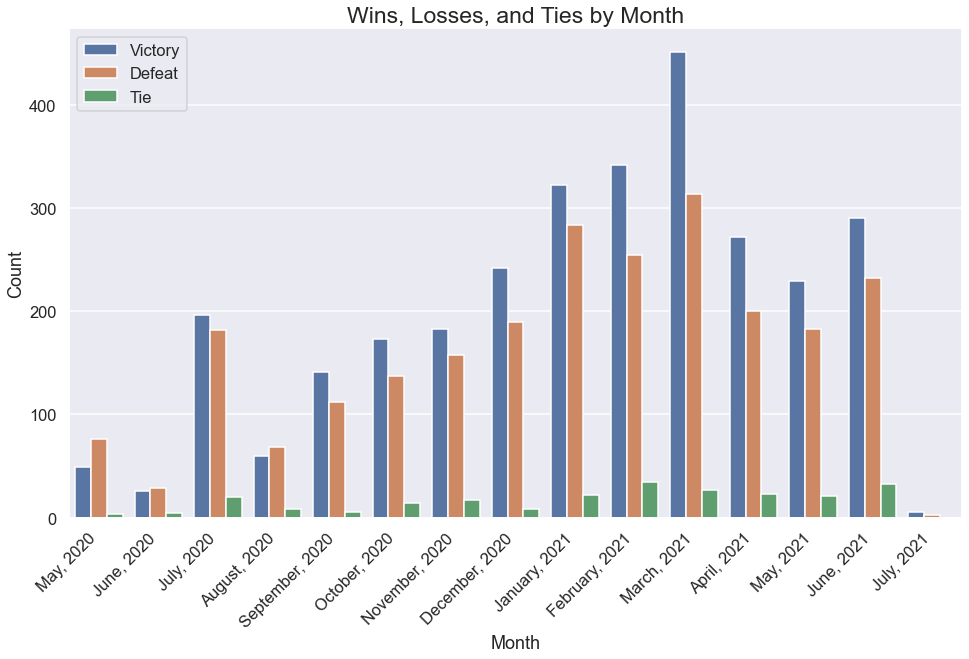

In [555]:
df = df_predate.copy()

sns.set(rc={'axes.facecolor':'white'})
sns.set_style("darkgrid")
sns.set_context('talk')

df['Month'] = pd.to_datetime(df['Date']).dt.to_period('M')
df['Month'] = df['Month'].dt.strftime('%B, %Y')

df = df[(df['Date'] > '2020-05-01')]

f, ax = plt.subplots(figsize=(16, 9))

ax = sns.countplot(x="Month", 
                   data=df.sort_values(by=['Date'], ascending=True), hue='WinLoseTie',
#                    data=df, hue='WinLoseTie',
                   hue_order=['Victory','Defeat','Tie'])

ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right');
ax.set_title('Wins, Losses, and Ties by Month', fontsize=23)
ax.set(ylabel='Count')
plt.legend(labels=['Victory', 'Defeat', 'Tie'])

df = df_predate.copy()

# Win Rate by Map

In [556]:
df['Win'] = df['WinLoseTie'].map({'Victory':1})
df['Lose'] = df['WinLoseTie'].map({'Defeat':1})

# df_groupby = df.groupby( ["Month"] ).sum()
# df_groupby
# win = df_groupby['Win']
# lose = df_groupby['Lose']
# ax = sns.countplot(x="Month", data=df_groupby)
# sns.catplot(x = 'investors', y='value', 
#             hue = 'investments',data=dfs1, 
#             kind='bar')

In [557]:
def choose_gametype(df, GameBaseVariantId, PlaylistId):
    if GameBaseVariantId == None and PlaylistId == None:
        gametype_df = df
    elif GameBaseVariantId == None:
        gametype_df = df[df['PlaylistId'] == PlaylistId]
    elif PlaylistId == None:
        gametype_df = df[df['GameBaseVariantId'] == GameBaseVariantId]
    else:
        gametype_df = df[(df['GameBaseVariantId'] == GameBaseVariantId) & (df['PlaylistId'] == PlaylistId)]
    
    return gametype_df

husky_df = choose_gametype(df, 'Capture the Flag', 'Super Fiesta Party')
slayer_df = choose_gametype(df, 'Slayer', 'Super Fiesta Party')


In [558]:
husky_gb_sum = husky_df.groupby( ["MapVariantId"] ).sum()
husky_gb_sum.reset_index(level=0, inplace=True)
husky_gb_sum['WinRate'] = husky_gb_sum['Win'] / husky_gb_sum['Lose']
husky_gb_sum = husky_gb_sum[~husky_gb_sum.isin([np.nan, np.inf, -np.inf]).any(1)]

husky_gb_mean = husky_df.groupby( ["MapVariantId"] ).mean()
husky_gb_mean.reset_index(level=0, inplace=True)
husky_gb_mean['WinRate'] = husky_gb_mean['Win'] / husky_gb_mean['Lose']
husky_gb_mean = husky_gb_mean[~husky_gb_mean.isin([np.nan, np.inf, -np.inf]).any(1)]

husky_gb.head(1)


,index,MapVariantId,DNF,TotalKills,TotalDeaths,K/D,Accuracy,TotalHeadshots,TotalWeaponDamage,TotalGrenadeKills,TotalGrenadeDamage,AvgLifeTimeOfPlayer,TotalTimePlayed,TotalDuration,Win,Lose,WinRate
0,0,Blood and Stone,0,1964,2602,157.997519,75.339873,136,252318.403049,43,11589.676155,2531.67524,866.854687,868.907452,110.0,71.0,1.549296


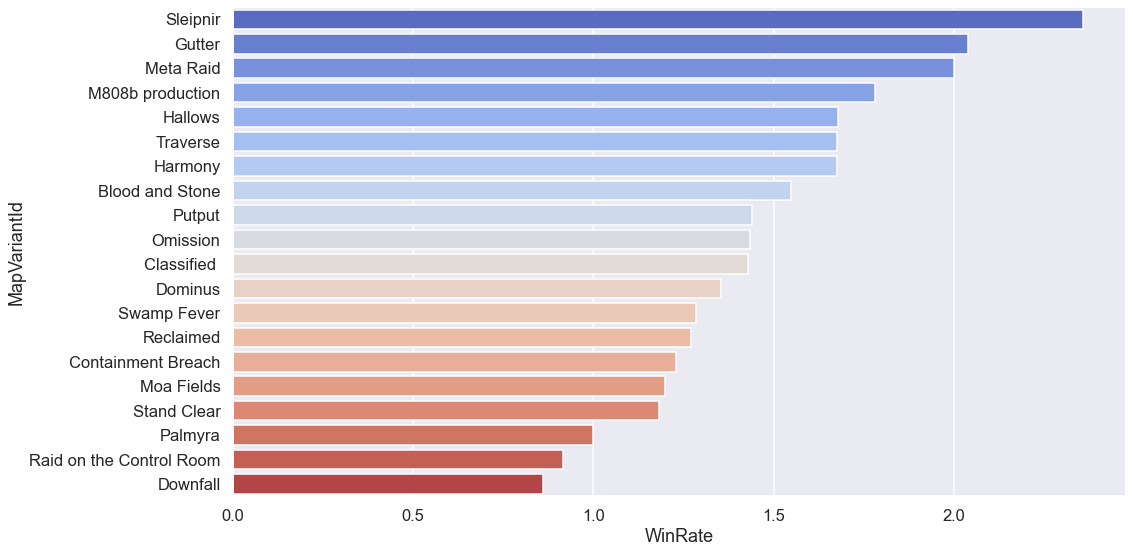

In [559]:
def map_plot(df, column):
    index=df.index
    f, ax = plt.subplots(figsize=(16, 9))
    sns.barplot(x=column, y='MapVariantId', 
                data=df.sort_values(by=[column], ascending=False),
#                 data=df.sort_values(by=[column], ascending=False),
                
                order=df.sort_values(column, ascending=False).MapVariantId,
                label="xxxxxx", palette=('coolwarm'))

map_plot(husky_gb_sum, 'WinRate')

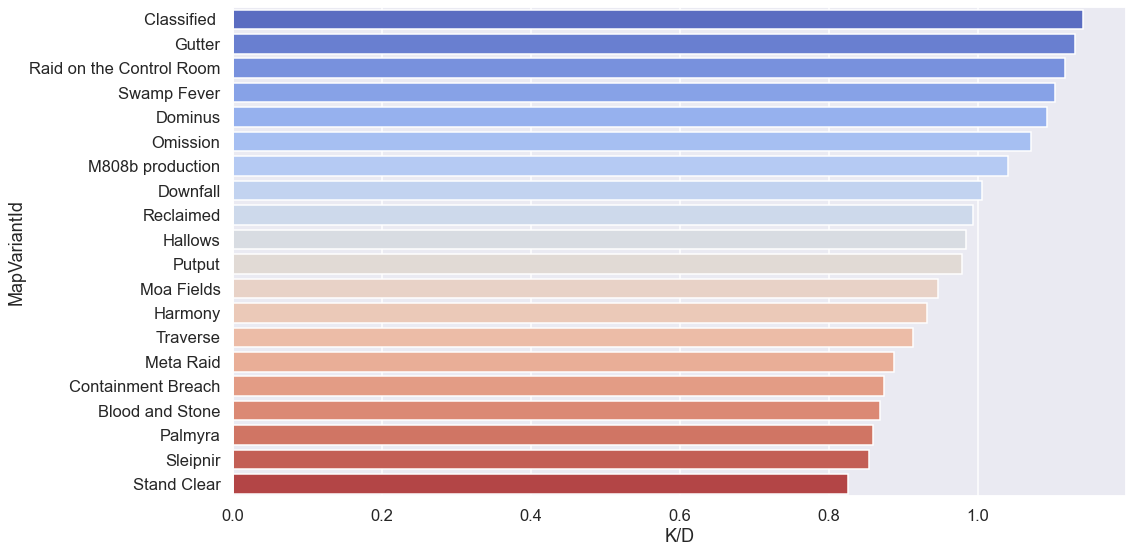

In [560]:
map_plot(husky_gb_mean, 'K/D')

In [317]:
# swamp_df = husky_df.loc[husky_df['MapVariantId'] == 'Swamp Fever']
# swamp_df['WinLoseTie'].value_counts()

Victory    45
Defeat     35
Tie         5
Name: WinLoseTie, dtype: int64

In [561]:
husky_gb_mean

,MapVariantId,DNF,TotalKills,TotalDeaths,K/D,Accuracy,TotalHeadshots,TotalWeaponDamage,TotalGrenadeKills,TotalGrenadeDamage,AvgLifeTimeOfPlayer,TotalTimePlayed,TotalDuration,Win,Lose,WinRate
0,Blood and Stone,False,10.791209,14.296703,0.868118,0.413955,0.747253,1386.364852,0.236264,63.679539,13.910304,4.762938,4.774217,1.0,1.0,1.0
1,Classified,False,20.450549,19.296703,1.141733,0.448119,0.780220,2592.932841,0.351648,87.977930,16.046422,7.250467,7.250828,1.0,1.0,1.0
3,Containment Breach,False,13.942529,16.873563,0.874138,0.405957,0.678161,1745.319610,0.206897,73.028361,16.778885,6.609643,6.610003,1.0,1.0,1.0
4,Dominus,False,15.515337,15.748466,1.092334,0.347483,2.552147,2017.284156,0.245399,64.874823,17.812510,6.310835,6.398709,1.0,1.0,1.0
5,Downfall,False,16.971429,18.523810,1.005532,0.430527,1.495238,2187.425981,0.361905,116.394401,15.660849,6.644006,6.680379,1.0,1.0,1.0
6,Gutter,False,15.952381,15.797619,1.130623,0.409357,0.845238,2110.222175,0.238095,101.960136,17.405676,6.390853,6.391226,1.0,1.0,1.0
7,Hallows,False,14.857143,16.714286,0.984344,0.382675,1.103896,1905.810456,0.220779,54.350111,17.314552,6.589592,6.598811,1.0,1.0,1.0
8,Harmony,False,14.250000,17.095745,0.932105,0.432998,0.723404,1829.834572,0.308511,90.808914,15.159387,6.057417,6.102520,1.0,1.0,1.0
9,M808b production,False,17.085366,18.292683,1.039894,0.432913,1.390244,2314.691079,0.402439,118.616661,16.882406,7.096047,7.150643,1.0,1.0,1.0
10,Meta Raid,False,16.862069,20.218391,0.886832,0.373204,2.172414,2226.186472,0.413793,117.333504,16.155759,7.444362,7.537730,1.0,1.0,1.0


In [422]:
# df['Day'] = df['Date'].dt.strftime('%B %d, %Y')
# df['Day']
# df['Week'] = df['Date'].dt.week
# df['Week']

0       26
1       26
2       26
3       26
4       26
        ..
5801    19
5802    19
5803    19
5804    19
5805    19
Name: Week, Length: 4782, dtype: int64

# K/D Date

In [562]:
df_kd = df.copy()

In [653]:
df = df_kd.copy()
df = choose_gametype(df, 'Slayer', None)
df['Day'] = df['Date'].dt.date
df['Day'] = df['Day'].apply(pd.to_datetime)
df_gb_mean = df.groupby(["Day"]).mean()
# df_gb_mean['K/D'].rolling('7D').mean()
# _grouped = df_gb_mean['K/D'].rolling('30D').mean()
_grouped = df_gb_mean[['TotalKills', 'TotalDeaths']].rolling('30D').mean()
df_gb_mean = pd.DataFrame(_grouped)
df_gb_mean.reset_index(level=0, inplace=True)
df_gb_mean

,Day,TotalKills,TotalDeaths
0,2015-11-16,9.000000,24.000000
1,2015-11-17,7.000000,19.500000
2,2015-11-18,5.000000,15.666667
3,2015-11-22,4.500000,14.500000
4,2015-11-23,4.600000,13.900000
...,...,...,...
326,2021-06-27,11.413560,10.236937
327,2021-06-28,11.306153,10.262863
328,2021-06-29,11.245736,10.210780
329,2021-06-30,11.303606,10.245502


In [657]:
df = df_kd.copy()
df = choose_gametype(df, 'Slayer', None)
df['Day'] = df['Date'].dt.date
df['Day'] = df['Day'].apply(pd.to_datetime)
df_gb_mean = df.groupby(["Day"]).mean()
# df_gb_mean['K/D'].rolling('7D').mean()
# _grouped = df_gb_mean['K/D'].rolling('30D').mean()
_grouped = df_gb_mean[['TotalKills', 'TotalDeaths']].rolling('30D').mean()
df_gb_mean = pd.DataFrame(_grouped)
df_gb_mean.reset_index(level=0, inplace=True)
df_gb_mean

,Day,TotalKills,TotalDeaths
0,2015-11-16,9.000000,24.000000
1,2015-11-17,7.000000,19.500000
2,2015-11-18,5.000000,15.666667
3,2015-11-22,4.500000,14.500000
4,2015-11-23,4.600000,13.900000
...,...,...,...
326,2021-06-27,11.413560,10.236937
327,2021-06-28,11.306153,10.262863
328,2021-06-29,11.245736,10.210780
329,2021-06-30,11.303606,10.245502


In [665]:
df.columns

Index(['Date', 'DNF', 'GameBaseVariantId', 'PlaylistId', 'MapVariantId',
       'WinLoseTie', 'TotalKills', 'TotalDeaths', 'K/D', 'Accuracy',
       'TotalHeadshots', 'TotalWeaponDamage', 'TotalGrenadeKills',
       'TotalGrenadeDamage', 'AvgLifeTimeOfPlayer', 'TotalTimePlayed',
       'TotalDuration', 'MatchId', 'Win', 'Lose', 'Day'],
      dtype='object')

In [678]:
df = df_kd.copy()

def stat_lineplot(df, column_list, rolling_days=30):

    df = choose_gametype(df, 'Slayer', None)
    df['Day'] = df['Date'].dt.date
    df['Day'] = df['Day'].apply(pd.to_datetime)
    df_gb_mean = df.groupby(["Day"]).mean()

    _grouped = df_gb_mean[column_list].rolling(f'{rolling_days}D').mean()

    df_gb_mean = pd.DataFrame(_grouped)
    df_gb_mean = df_gb_mean[((df_gb_mean.index > '2021-01-01') & (df_gb_mean.index > '2020-06-30'))]

    f, ax = plt.subplots(figsize=(16, 9))
    ax = sns.lineplot(data=df_gb_mean)
    plt.xlabel('Date')

# column_list = ['TotalKills', 'TotalDeaths']

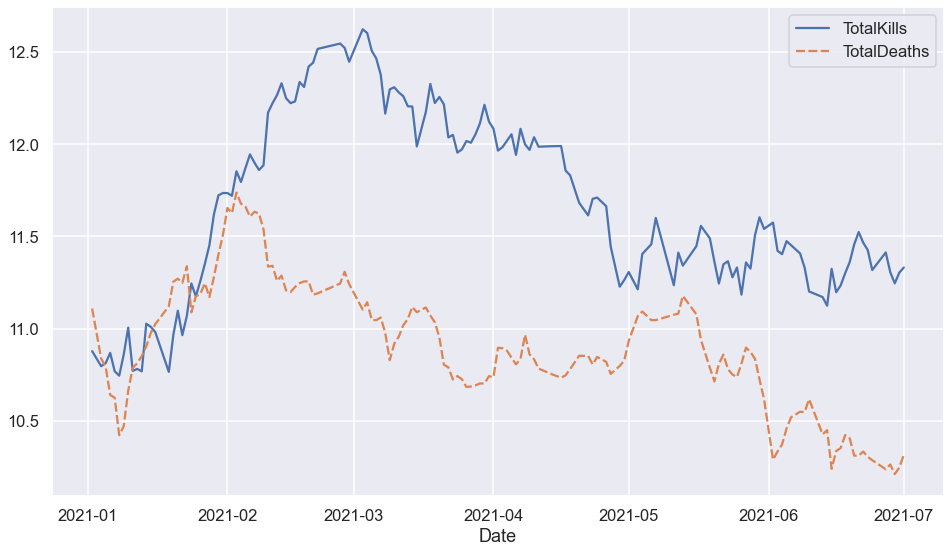

In [683]:
column_list = ['TotalKills', 'TotalDeaths']

stat_lineplot(df, column_list, rolling_days=30)

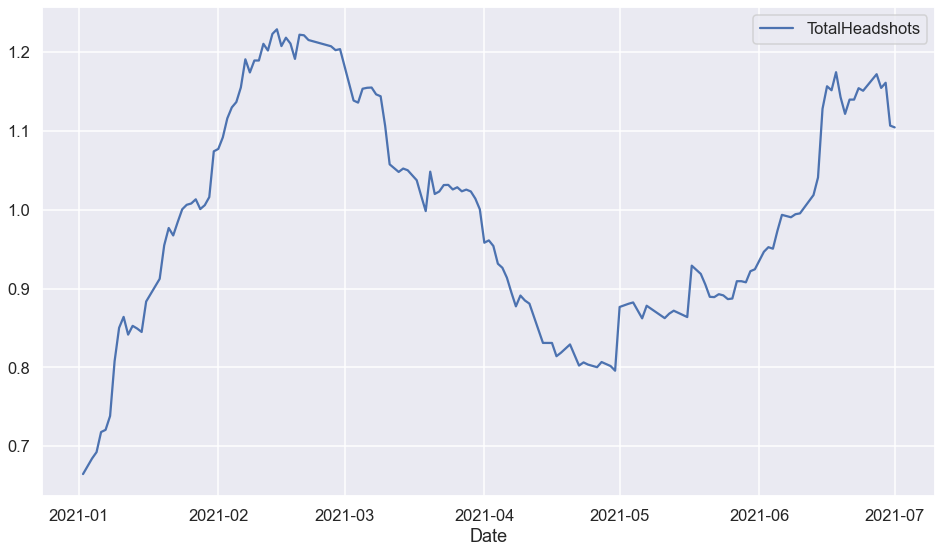

In [684]:
column_list = ['TotalHeadshots']

stat_lineplot(df, column_list, rolling_days=60)

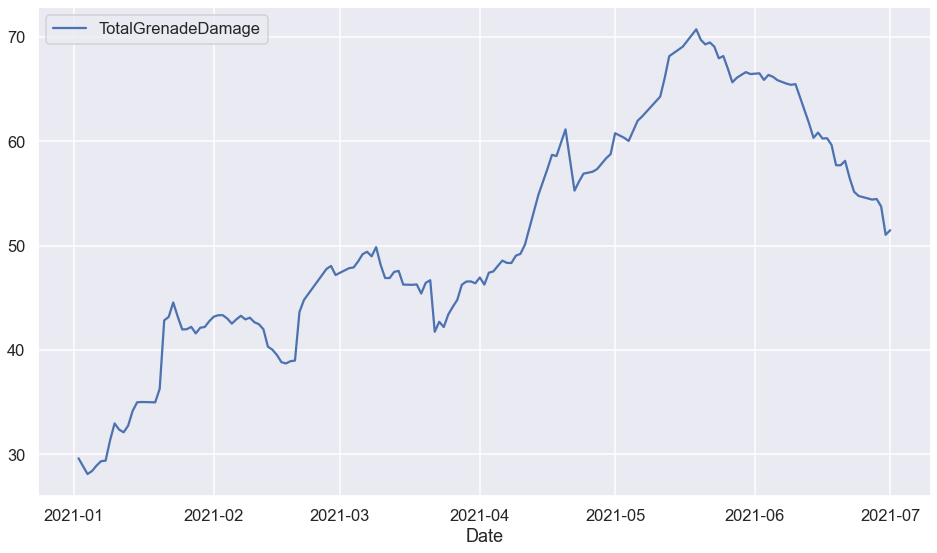

In [686]:
column_list = ['TotalGrenadeDamage']

stat_lineplot(df, column_list, rolling_days=60)

Text(0.5, 0, 'Date')

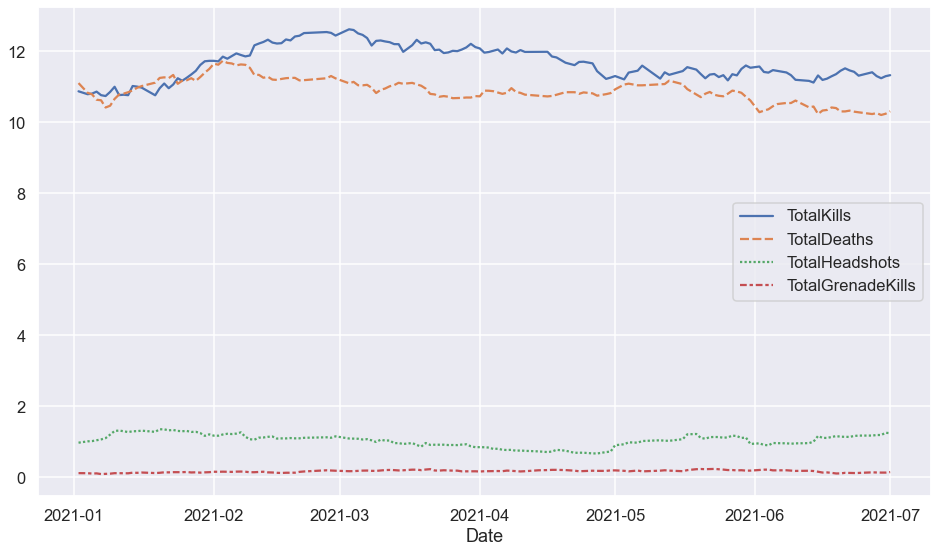

In [666]:
df = df_kd.copy()
df = choose_gametype(df, 'Slayer', None)
df['Day'] = df['Date'].dt.date
df['Day'] = df['Day'].apply(pd.to_datetime)
df_gb_mean = df.groupby(["Day"]).mean()
# df_gb_mean['K/D'].rolling('7D').mean()
# _grouped = df_gb_mean['K/D'].rolling('30D').mean()
# _grouped = df_gb_mean[['TotalKills', 'TotalDeaths', 'TotalHeadshots', 
#                        'TotalGrenadeKills']].rolling('30D').mean()
_grouped = df_gb_mean[['TotalKills', 'TotalDeaths', 'TotalHeadshots', 
                       'TotalGrenadeKills']].rolling('30D').mean()

df_gb_mean = pd.DataFrame(_grouped)
# df_gb_mean.reset_index(level=0, inplace=True)

# df_gb_mean = df_gb_mean[((df_gb_mean['Day'] > '2021-01-01') & (df_gb_mean['Day'] > '2020-06-30'))]
df_gb_mean = df_gb_mean[((df_gb_mean.index > '2021-01-01') & (df_gb_mean.index > '2020-06-30'))]

f, ax = plt.subplots(figsize=(16, 9))
# ax = sns.lineplot(data=df_gb_mean, x="Day", y="TotalKills")
# sns.lineplot(data=df_gb_mean, x='Day', y="K/D")
ax = sns.lineplot(data=df_gb_mean)
plt.xlabel('Date')
# ax.set_xtickslabels(df_gb_mean['Day'])


In [650]:
len(df_gb_mean)

150

# Load Player Match History and All Matches

In [ ]:
df_history = pd.read_csv('DrymanderHistoryExplode.csv')

with open('match_details.pkl', 'rb') as match_details:
    match_details = pickle.load(match_details)
    
len(match_details)

## Add MatchId, GameBaseVariantId

In [ ]:
df = pd.DataFrame()

df['MatchId'] = df_history['MatchId']
df['GameBaseVariantId'] = df_history['GameBaseVariantId']

df.head(3)

## Store GameBaseVariantId Original Column

We'll store this column as its own dataframe, which will be necessary for pulling the game variant in our Player History step.

In [ ]:
game_base_column_store_df = pd.DataFrame()
game_base_column_store_df['MatchId'] = df_history['MatchId']
game_base_column_store_df['GameBaseVariantId'] = df_history['GameBaseVariantId']
game_base_column_store_df

## MapVariantId

In [ ]:
MapVariantId_list = []

for match in match_details:
    MapVariantId = match['MapVariantId']
    MapVariantId_list.append(MapVariantId)
    
df['MapVariantId'] = MapVariantId_list

df.head(3)

## Playlist ID

In [ ]:
PlaylistId_list = []

for match in match_details:
    PlaylistId = match['PlaylistId']
    PlaylistId_list.append(PlaylistId)
    
df['PlaylistId'] = PlaylistId_list

df.head(3)

# df.to_csv('playlist.csv')

# Convert Codes to Names

Now that we have MatchId, GameBaseVariantId, MapVariantId, and PlaylistId, we'll convert these to their readable naems that might be more familiar to players.

## Decode Column ID Function

In [ ]:
def decode_maps(df, column, api_dict):
    decoded_list = []

    for row in df[column]:
        i = 0
        map_count = len(api_dict)
    #     print(row)
        for item in api_dict:
            if (i+1) == map_count:
                name = 'Custom Map'
                decoded_list.append(name)
            elif item['id'] == row:
                name = item['name']
                decoded_list.append(name)
            else:
                i += 1

#     df[column] = decoded_list
    
    return decoded_list
# df = pd.read_csv('MODEL_PULL - Copy.csv')
# # df = df.reset_index
# df = df.drop(['Unnamed: 0'], axis=1)
# df['GameBaseVariantId'] = decode_column(df, 'GameBaseVariantId', GameBaseVariantId_dic)
# df['PlaylistId'] = decode_column(df, 'PlaylistId', PlaylistId_dic)
# df['MapVariantId'] = decode_maps(df, 'MapVariantId', map_list)

In [ ]:
def decode_column(df, column, api_dict):
    decoded_list = []

    for row in df[column]:
        i = 0
    #     print(row)
        for item in api_dict:
            if item['id'] == row:
                name = item['name']
                decoded_list.append(name)
            else:
                i += 1

#     df[column] = decoded_list
    
    return decoded_list



# decode_column(df, 'PlaylistId', plid)
# # decode_column(df, 'GameBaseVariantId', gbv)

## GameBaseVariant

In [ ]:
run = False

if run == True:
    headers = {
        # Request headers
        'Accept-Language': 'en',
        'Ocp-Apim-Subscription-Key': api_key,
    }

    params = urllib.parse.urlencode({
    })

    try:
        conn = http.client.HTTPSConnection('www.haloapi.com')
        conn.request("GET", "/metadata/h5/metadata/game-base-variants?%s" % params, "{body}", headers)
        response = conn.getresponse()
        data = response.read()
        GameBaseVariantId_dic = json.loads(data)
    #     print(data)
        conn.close()
    except Exception as e:
        print("[Errno {0}] {1}".format(e.errno, e.strerror))

    with open('GameBaseVariantId.pkl', 'wb') as GameBaseVariantId_pickle:
        pickle.dump(GameBaseVariantId_dic, GameBaseVariantId_pickle)

else:
    with open('GameBaseVariantId.pkl', 'rb') as GameBaseVariantId_pickle:
        GameBaseVariantId_dic = pickle.load(GameBaseVariantId_pickle)
    


In [ ]:
df['GameBaseVariantId'] = decode_column(df, 'GameBaseVariantId', GameBaseVariantId_dic)

df.head(3)

In [ ]:
df['GameBaseVariantId'].unique()

In [ ]:
df['GameBaseVariantId'] = df_history['GameBaseVariantId']

df.head(3)

## Playlist ID

In [ ]:
run = True

if run == True:

    headers = {
        # Request headers
        'Accept-Language': 'en',
        'Ocp-Apim-Subscription-Key': api_key,
    }

    params = urllib.parse.urlencode({
    })

    try:
        conn = http.client.HTTPSConnection('www.haloapi.com')
        conn.request("GET", "/metadata/h5/metadata/playlists?%s" % params, "{body}", headers)
        response = conn.getresponse()
        data = response.read()
        PlaylistId_dic = json.loads(data)
#         print(data)
        conn.close()
    except Exception as e:
        print("[Errno {0}] {1}".format(e.errno, e.strerror))

    with open('PlaylistId_dic.pkl', 'wb') as PlaylistId_dic_pickle:
        pickle.dump(PlaylistId_dic, PlaylistId_dic_pickle)
        
else:
    with open('PlaylistId_dic.pkl', 'rb') as PlaylistId_dic_pickle:
        PlaylistId_dic = pickle.load(PlaylistId_dic_pickle)

In [ ]:
df['PlaylistId'] = decode_column(df, 'PlaylistId', PlaylistId_dic)

df.head(3)

In [ ]:
df['PlaylistId'].unique()

In [ ]:
df['PlaylistId'].value_counts()

## MapId

In [ ]:
unique_map_ids = df['MapVariantId'].unique()

In [ ]:
run = False

if run == True:

    headers = {
        # Request headers
        'Accept-Language': 'en',
        'Ocp-Apim-Subscription-Key': api_key,
    }

    params = urllib.parse.urlencode({
    })
    map_list = []
    for map_id in tqdm(unique_map_ids):
        try:
            conn = http.client.HTTPSConnection('www.haloapi.com')
            conn.request("GET", f"/metadata/h5/metadata/map-variants/{map_id}?%s" % params, "{body}", headers)
            response = conn.getresponse()
            data = response.read()
            map_dic = json.loads(data)
            map_list.append(map_dic)
    #         print(data)
            conn.close()
            time.sleep(1.1)
        except Exception as e:
            print("[Errno {0}] {1}".format(e.errno, e.strerror))

    with open('map_list.pkl', 'wb') as map_list_pickle:
        pickle.dump(map_list, map_list_pickle)

else:
    with open('map_list.pkl', 'rb') as map_list_pickle:
        map_list = pickle.load(map_list_pickle)
    



In [ ]:
df['MapVariantId'] = decode_column(df, 'MapVariantId', map_list)

df.head(10)

In [ ]:
df['MapVariantId'].unique()

# Model Dataframe

## Add MatchId to Match Details DF

Our full match details pull did not include MatchId's, but we were able to retrieve those from our original full player history pull.  Fortunately everything is sequential, so we can add MatchId's to our match details dictionary with a basic for loop.  We'll test everything to make sure everything lines up.

In [ ]:
i = 0

for match in match_details:
    match['MatchId'] = df['MatchId'].iloc[i]
    i += 1

In [ ]:
i = 5902

print(match_details[i]['MatchId'])

print(df['MatchId'].iloc[i])

## Initial Columns

In [ ]:
# match_details_df = pd.DataFrame()

# match_details_df_columns = [
#     'MatchId',
#     'PlayerWin',
#     'P1',
#     'P1_SpartanRank',
#     'P1_PrevTotalXP',
#     'P2',
#     'P2_SpartanRank',
#     'P2_PrevTotalXP',
#     'P3',
#     'P3_SpartanRank',
#     'P3_PrevTotalXP',
#     'P4',
#     'P4_SpartanRank',
#     'P4_PrevTotalXP',
#     'E1',
#     'E1_SpartanRank',
#     'E1_PrevTotalXP',
#     'E2',
#     'E2_SpartanRank',
#     'E2_PrevTotalXP',
#     'E3',
#     'E3_SpartanRank',
#     'E3_PrevTotalXP',
#     'E4',
#     'E4_SpartanRank',
#     'E4_PrevTotalXP',
# ]

# match_details_df = pd.DataFrame(columns=match_details_df_columns)
# match_details_df

In [ ]:
# # player_df_spartanrank = player_df.copy()

# run = False

# if run == True:
#     error_count = 0

#     row_count = 0

#     user = 'Drymander'

#     for match in tqdm(match_details):
#     # for match in tqdm(mds):

#         try:
#             data = match
#             df_match = pd.DataFrame()
#             columns = [
#                 'TeamId',
#                 'Gamertag',
#                 'SpartanRank',
#                 'PrevTotalXP',
#             ]
#             df_match = pd.DataFrame(columns = columns)
#             i = 0

#             if len(data['PlayerStats']) != 8:
#                 continue

#             for player in data['PlayerStats']:

#                 player_dic = {}
#                 # Team ID
#                 player_dic['TeamId'] = data['PlayerStats'][i]['TeamId']
#                 if player_dic['TeamId'] not in (0, 1):
#                     continue
#                 # Gamer Tag
#                 player_dic['Gamertag'] = data['PlayerStats'][i]['Player']['Gamertag']
#                 # Spartan Rank
#                 player_dic['SpartanRank'] = data['PlayerStats'][i]['XpInfo']['SpartanRank']
#                 # Previous Total XP
#                 player_dic['PrevTotalXP'] = data['PlayerStats'][i]['XpInfo']['PrevTotalXP']
#                 df_match = df_match.append(player_dic, ignore_index=True)
#                 i += 1

#             playerteam = df_match.loc[df_match['Gamertag'] == user, 'TeamId'].values[0]

#             if data['TeamStats'][0]['TeamId'] == playerteam:
#                 playerteam_stats = data['TeamStats'][0]
#                 enemyteam_stats = data['TeamStats'][1]
#             else: 
#                 playerteam_stats = data['TeamStats'][1]
#                 enemyteam_stats = data['TeamStats'][0]

#             # Tie
#             if playerteam_stats['Rank'] == 1 and enemyteam_stats['Rank'] == 1:
#                 winner = 'Tie'
#             # Player wins
#             elif playerteam_stats['Rank'] == 1 and enemyteam_stats['Rank'] == 2:
#                 winner = 'Player'
#             # Enemy wins
#             elif playerteam_stats['Rank'] == 2 and enemyteam_stats['Rank'] == 1:
#                 winner = 'Enemy'
#             # Error handling
#             else:
#                 winner = 'Error determining winner'

#             player_df = df_match.loc[df_match['TeamId'] == playerteam]
#             enemy_df = df_match.loc[df_match['TeamId'] != playerteam]

#             row_list = []
#             row_list.append(match['MatchId'])
#             row_list.append(winner)
#             for row in range(len(player_df)):
#                 row_list.extend(list(player_df.iloc[row].values[1:]))
#             for row in range(len(enemy_df)):
#                 row_list.extend(list(enemy_df.iloc[row].values[1:]))

#             match_details_df.loc[row_count] = row_list

#             row_count += 1

#         except:
#             error_count += 1
#             continue
#     print(error_count)
#     match_details_df.to_csv('match_details_df.csv')
#     match_details_df.head(5)
#     match_details_df = match_details_df.drop(['Unnamed: 0'], axis=1)
    
# else:
#     match_details_df = pd.read_csv('match_details_df.csv')
#     match_details_df = match_details_df.drop(['Unnamed: 0'], axis=1)
    

In [ ]:
# match_details_df.head(3)

In [ ]:
# match_details_df['PlayerWin'].value_counts()

# Merge Player DF with Base DF

In [ ]:
# df2 = pd.merge(df, match_details_df, how='inner', on = 'MatchId')
# df2.to_csv('df2.csv')

# df2.head(10)

In [ ]:
# df2 = pd.read_csv("df2.csv")
# df2 = df2.drop(['Unnamed: 0'], axis=1)
# df2 = df2.drop(['Unnamed: 0.1'], axis=1)
# df2

# Pull Stats for All Players

Using our match_details_df, we'll pull extended stats for every player we've played with.  This will allow us to pull out more detailed features based on game variant, since players often spend more time in their favoriate variants.

## Create List of Unique Gamertags

In [ ]:
# column_list = ['P1', 'P2', 'P3', 'P4', 'E1', 'E2', 'E3', 'E4']

# unique_gamertags = []

# for column in column_list:
#     unique_gamertags.extend(list(df2[column].unique()))

# len(unique_gamertags)

# with open('unique_gamertags.pkl', 'wb') as unique_gamertags_pickle:
#     pickle.dump(unique_gamertags, unique_gamertags_pickle)



In [ ]:
# gamertag_groups = np.array_split(unique_gamertags, 758)
# gamertag_groups[0]

In [ ]:
# gamertag_groups

## Code to convert list of player names into a string for the API

In [ ]:
# player_list = str(list(gamertag_groups[0]))[1:-1]

# player_list
# player_list = player_list.replace(', ',',')
# player_list = player_list.replace("'",'')
# player_list = player_list.replace(' ','+')

# player_list

## Player Stats API Call

In [ ]:
# run = False

# if run == True:

#     all_players = []

#     headers = {
#         # Request headers
#         'Ocp-Apim-Subscription-Key': str(api_key),
#     }

#     params = urllib.parse.urlencode({
#         # Request parameters
#     #     'seasonId': '{string}',

#     })

# #     for group in tqdm(gamertag_groups[0:3]):
#     for group in tqdm(gamertag_groups):

#         player_list = str(list(group))[1:-1]
#         player_list = player_list.replace(', ',',')
#         player_list = player_list.replace("'",'')
#         player_list = player_list.replace(' ','+')

#         try:
#             conn = http.client.HTTPSConnection('www.haloapi.com')
#             conn.request("GET", f"/stats/h5/servicerecords/arena?players={player_list}&%s" % params, "{body}", headers)

#             response = conn.getresponse()
#             players_stats = json.loads(response.read())
#             all_players.extend(players_stats['Results'])
#         #     print(data)
#             conn.close()
#         except Exception as e:
#             print("[Errno {0}] {1}".format(e.errno, e.strerror))

#         time.sleep(1.1)

#     with open('all_players.pkl', 'wb') as all_players_pickle:
#         pickle.dump(all_players, all_players_pickle)

# ######## CAUTION - THIS CONSUMES 16 GB of RAM ##########
# else:
#     with open('all_players.pkl', 'rb') as all_players_pickle:
#         all_players = pickle.load(all_players_pickle)
    
# len(all_players)


# Merge All Player Stats with Base Dataframe

## Reset GameVaseVariantID to code for model DF

In [ ]:
# df2_save = df2.copy()

In [ ]:
# df2.head(2)

In [ ]:
# run = False

# if run == True:

#     df = df2.copy()

#     row_count = 0

#     for index, row in tqdm(df.iterrows()):

#         # Set Variant ID
#         variant_id = df['GameBaseVariantId'].values[0]

#         # Define player / enemy variables
#         P1 = (df['P1'].values[row_count], 'P1')
#         P2 = (df['P2'].values[row_count], 'P2')
#         P3 = (df['P3'].values[row_count], 'P3')
#         P4 = (df['P4'].values[row_count], 'P4')
#         E1 = (df['E1'].values[row_count], 'E1')
#         E2 = (df['E2'].values[row_count], 'E2')
#         E3 = (df['E3'].values[row_count], 'E3')
#         E4 = (df['E4'].values[row_count], 'E4')
#         roster = [P1, P2, P3, P4, E1, E2, E3, E4]

#         # For loop to loop through player / enemy variables in dataframe    
#         for p in roster:        
#             i = 0   

#             # Loop through large all_players dictionary and find player / enemy gamertag
#             for player in all_players:
#                 if all_players[i]['Id'] == p[0]:
#     #                 print('found')

#                     # Once gamertag found, locate game variant as specified by dataframe row
#                     for variant in player['Result']['ArenaStats']['ArenaGameBaseVariantStats']:
#                         if variant['GameBaseVariantId'] == variant_id:
#                             # Create new row if does not already exist AND
#                             # Create new column for TotalTimePlayed using P1, P2, E1, etc.
#                             if p[1] + '_TotalTimePlayed' not in df:
#                                 df[p[1] + '_TotalTimePlayed'] = pd.Series()
#                             try:
#                                 df[p[1] + '_TotalTimePlayed'].iloc[row_count] = isodate.parse_duration(variant['TotalTimePlayed']).total_seconds() / 3600
#                             except:
#                                 df[p[1] + '_TotalTimePlayed'].iloc[row_count] = None

#                             if p[1] + '_K/D' not in df:
#                                 df[p[1] + '_K/D'] = pd.Series()
#                             try:
#                                 df[p[1] + '_K/D'].iloc[row_count] = variant['TotalKills'] / variant['TotalDeaths']
#                             except:
#                                 df[p[1] + '_K/D'].iloc[row_count] = None

#                             if p[1] + '_Accuracy' not in df:
#                                 df[p[1] + '_Accuracy'] = pd.Series()     
#                             try:
#                                 df[p[1] + '_Accuracy'].iloc[row_count] = variant['TotalShotsLanded'] / variant['TotalShotsFired']
#                             except:
#                                 df[p[1] + '_Accuracy'].iloc[row_count] = None

#                             if p[1] + '_WinRate' not in df:
#                                 df[p[1] + '_WinRate'] = pd.Series()
#                             try: 
#                                 df[p[1] + '_WinRate'].iloc[row_count] = variant['TotalGamesWon'] / variant['TotalGamesLost']
#                             except:
#                                 df[p[1] + '_WinRate'].iloc[row_count] = None

#                     i += 1
#         #                 else: 
#         #                     continue
#                 else:
#                     i += 1
#                     continue

#         row_count += 1

#     ##     Convert df['PlayerWin'] to .int
#     #     df = df[df['PlayerWin'] != 'Tie']
#     #     df.loc[(df['PlayerWin'] == 'Player'),'PlayerWin'] = 1
#     #     df.loc[(df['PlayerWin'] == 'Enemy'),'PlayerWin'] = 0
#     #     df['PlayerWin'] = df['PlayerWin'].astype('int')

#         df.to_csv('model_df_w_all_features.csv')

# else:
#     df = pd.read_csv('model_df_w_all_features.csv')

# df.head(3)

# Model DF from Single Match Pull

In [ ]:
df = pd.read_csv('MODEL_PULL.csv')

df

In [ ]:
df['MapVariantId']

In [ ]:
df = pd.read_csv('MODEL_PULL.csv')
# df = df.reset_index
df = df.drop(['Unnamed: 0'], axis=1)
df['GameBaseVariantId'] = decode_column(df, 'GameBaseVariantId', GameBaseVariantId_dic)
df['PlaylistId'] = decode_column(df, 'PlaylistId', PlaylistId_dic)
df['MapVariantId'] = decode_maps(df, 'MapVariantId', map_list)

df = df[df['WinLoseTie'] != 'Tie']
df.loc[(df['WinLoseTie'] == 'Victory'),'WinLoseTie'] = 1
df.loc[(df['WinLoseTie'] == 'Defeat'),'WinLoseTie'] = 0
df['WinLoseTie'] = df['WinLoseTie'].astype('int')

df['Date'] = df['Date'].apply(pd.to_datetime)
df = df[(df['Date'] > '2021-07-01')]

df

# Choose GameBaseVariantId to model

In [ ]:
def choose_gametype(df, GameBaseVariantId, PlaylistId):
    if GameBaseVariantId == None and PlaylistId == None:
        gametype_df = df
    elif GameBaseVariantId == None:
        gametype_df = df[df['PlaylistId'] == PlaylistId]
    elif PlaylistId == None:
        gametype_df = df[df['GameBaseVariantId'] == GameBaseVariantId]
    else:
        gametype_df = df[(df['GameBaseVariantId'] == GameBaseVariantId) & (df['PlaylistId'] == PlaylistId)]
    
    return gametype_df

df = choose_gametype(df, None, 'Super Fiesta Party')
# df = choose_gametype(df, None, None)
df['PlaylistId'].value_counts()

## Drop columns

In [ ]:
df = df.drop(['Date',
        'MatchId',
        'GameBaseVariantId',
        'PlaylistId',
        'MapVariantId',
        'P1_Gamertag',
        'P2_Gamertag',
        'P3_Gamertag',
        'P4_Gamertag',
        'E1_Gamertag',
        'E2_Gamertag',
        'E3_Gamertag',
        'E4_Gamertag',
        'P1_TotalPowerWeaponPossessionTime',
        'P2_TotalPowerWeaponPossessionTime',
        'P3_TotalPowerWeaponPossessionTime',
        'P4_TotalPowerWeaponPossessionTime',
        'E1_TotalPowerWeaponPossessionTime',
        'E2_TotalPowerWeaponPossessionTime',
        'E3_TotalPowerWeaponPossessionTime',
        'E4_TotalPowerWeaponPossessionTime',
        ]
        ,axis=1)
df.rename(columns={'WinLoseTie':'PlayerWin'}, inplace=True)

df

## Feature Creation

In [ ]:
roster = ['P1', 'P2', 'P3', 'P4', 'E1', 'E2', 'E3', 'E4']

for player in roster:
    df[f'{player}_WinRate'] = df[f'{player}_TotalGamesWon'] / df[f'{player}_TotalGamesLost']
    df[f'{player}_K/D'] = df[f'{player}_TotalKills'] / df[f'{player}_TotalDeaths']
    df[f'{player}_Accuracy'] = df[f'{player}_TotalShotsLanded'] / df[f'{player}_TotalShotsFired']

df = df.dropna()
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

In [ ]:
# df.columns.values

# Load Model DF from csv

In [ ]:
# df['GameBaseVariantId'] = decode_column(df, 'GameBaseVariantId', GameBaseVariantId_dic)
# df = df.drop(['Unnamed: 0'], axis=1)
# df = df[df['PlayerWin'] != 'Tie']
# df.loc[(df['PlayerWin'] == 'Player'),'PlayerWin'] = 1
# df.loc[(df['PlayerWin'] == 'Enemy'),'PlayerWin'] = 0
# df['PlayerWin'] = df['PlayerWin'].astype('int')

# df.head(10)

# Make Model Dataframe Function

In [ ]:
# feature_list = ['WinRate', 'TotalKills', 'TotalHeadshots', 'TotalWeaponDamage', 
#                 'TotalShotsFired', 'K/D', 
#                 'TotalShotsLanded', 'TotalMeleeKills', 'TotalMeleeDamage', 'TotalAssassinations',
#                 'TotalGroundPoundKills', 'TotalGroundPoundDamage', 'TotalShoulderBashKills',
#                 'TotalShoulderBashDamage', 'TotalGrenadeDamage', 'TotalPowerWeaponKills',
#                 'TotalPowerWeaponDamage', 'TotalPowerWeaponGrabs',
#                 'TotalDeaths', 'TotalAssists', 'TotalGamesCompleted', 'TotalGamesWon',
#                 'TotalGamesLost', 'TotalGamesTied', 'TotalTimePlayed','TotalGrenadeKills',
#                 'PrevTotalXP', 'SpartanRank']
feature_list = ['WinRate', 'K/D', 'TotalGamesCompleted', 'TotalTimePlayed',
                'PrevTotalXP', 'SpartanRank']


def make_model_df(df, feature_list, GameBaseVariantId, PlaylistId):
    
    df = choose_gametype(df, GameBaseVariantId, PlaylistId) 
    model_df = pd.DataFrame()
    model_df['PlayerWin'] = df['PlayerWin']
    # Creating columns
    for feature in feature_list:
        feature_columns = [
            f'P1_{feature}', f'P2_{feature}',
            f'P3_{feature}', f'P4_{feature}', f'E1_{feature}',
            f'E2_{feature}', f'E3_{feature}', f'E4_{feature}',
            ]

        feature_df = df[feature_columns].copy()

        # Sort Players in dataframe by highest value
        i = 0
        for row in tqdm(feature_df.iterrows()):
                # Sort player / enemy from highest to lowest in row
            feature_df.iloc[i, 0:4] = feature_df.iloc[i, 0:4].sort_values(ascending=False).values
            feature_df.iloc[i, 4:8] = feature_df.iloc[i, 4:8].sort_values(ascending=False).values
            i += 1
            
        model_df = model_df.join(feature_df, on=model_df.index)
        
    model_df = model_df.dropna()
    return model_df
            
# model_df = make_model_df(hr_df, ['TotalTimePlayed'])
# hr_model_df = make_model_df(hr_df, ['TotalTimePlayed'])
df = make_model_df(df, feature_list, None, None)

df

In [ ]:
df_total=pd.DataFrame()
df_total['PlayerWin'] = df['PlayerWin']
for feature in feature_list:
    df_total[f'Player_{feature}'] = df[f'P1_{feature}'] + df[f'P2_{feature}'] + df[f'P3_{feature}'] + df[f'P4_{feature}']
    df_total[f'Enemy_{feature}'] = df[f'E1_{feature}'] + df[f'E2_{feature}'] + df[f'E3_{feature}'] + df[f'E4_{feature}']
    df_total[f'Player_{feature}'] = df_total[f'Player_{feature}'] / 4
    df_total[f'Enemy_{feature}'] = df_total[f'Enemy_{feature}'] / 4

    
df = df_total.copy()
df

In [ ]:
df

# Model with All Features

In [ ]:
model_df = df.copy()

# Assigning X and y for train test split

features = model_df.drop(['PlayerWin'], axis=1)
target = model_df['PlayerWin']


X = features
y = target

y=y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=8)

print(X_train.shape)
print(X_test.shape)

In [ ]:
# model_log = LogisticRegression(random_state=8)
model_log = LogisticRegression(random_state=8)
model_log.fit(X_train, y_train)

In [ ]:
def cross_val_check(model_string_name, model, X_train, y_train, X_test, y_test):
    scores = cross_val_score(model, X_train, y_train, cv=5) # model, train, target, cross validation
    print(f'{model_string_name} Cross Validation Scores:')
    print(scores)
    print(f'\nCross validation mean: \t{scores.mean():.2%}')
    
cross_val_check('Logistic Regression', model_log, X_train, y_train, X_test, y_test)

In [ ]:
def evaluate_model(model, X_train, X_test, y_train, 
                   y_test, cmap='Greens', normalize=None,
                   classes=None,figsize=(10,4), graphs=False):
    
    """
    model :: classifier user desires to evaluate
    X_train :: X training data
    X_test :: X test data
    y_train :: y_train data
    y_test :: y_train data
    cmap :: color palette of confusion matrix
    normalize :: set to True if normalized confusion matrix is desired
    figsize :: desired plot size

    """
    
    # Print model accuracy
    print(f'Training Accuracy: {model.score(X_train,y_train):.2%}')
    print(f'Test Accuracy: {model.score(X_test,y_test):.2%}')
    print('')
    
    if graphs == True:
        # Print classification report
        y_test_predict = model.predict(X_test)
        print(metrics.classification_report(y_test, y_test_predict,
                                            target_names=classes))

        # Plot confusion matrix
        fig,ax = plt.subplots(ncols=2,figsize=figsize)
        metrics.plot_confusion_matrix(model, X_test,y_test,cmap=cmap, 
                                      normalize=normalize,display_labels=classes,
                                      ax=ax[0])

        #Plot ROC curves
        with sns.axes_style("darkgrid"):
            curve = metrics.plot_roc_curve(model,X_train,y_train,ax=ax[1])
            curve2 = metrics.plot_roc_curve(model,X_test,y_test,ax=ax[1])
            curve.ax_.grid()
            curve.ax_.plot([0,1],[0,1],ls=':')
            fig.tight_layout()
            plt.show()
        
evaluate_model(model_log, X_train, X_test, y_train, 
                   y_test, graphs=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler

In [ ]:
def make_model(df, regressor=LogisticRegression, scale=False, graphs=False, dummy=False, cmap='Greens',
              slim=False, scaler=StandardScaler()):

    # Assigning X and y for train test split

    X = df.drop(['PlayerWin'], axis=1)
    y = df['PlayerWin']

    y=y.astype('int')

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                        random_state=8)
    
    if scale==True:
#         numericals = X.select_dtypes(X.iloc[1].dtypes).columns
        scaler = scaler
        X_train = pd.DataFrame(scaler.fit_transform(X_train))
        X_test = pd.DataFrame(scaler.transform(X_test))
    
    if dummy == True:
        model_log = DummyClassifier(strategy='stratified')
        print('Using Dummy Model')
    else:
        model_log = regressor
    
    model_log.fit(X_train, y_train)
    total_samples = X_train.shape[0] + X_test.shape[0]
    print(f'Total number of samples: {total_samples}')
    print('------------------------------------------')
#     print(f'The X_train shape is: {X_train.shape}')
#     print(f'The X_test shape is: {X_test.shape}')
    if slim == False:
        cross_val_check('Logistic Regression', model_log, X_train, y_train, X_test, y_test)
    evaluate_model(model_log, X_train, X_test, y_train, y_test, graphs=graphs, cmap=cmap)
    
#     return X_train, X_test, y_train, y_test

make_model(model_df, scale=False, graphs=True, regressor=LogisticRegression())

In [ ]:
make_model(model_df, scale=True, graphs=True, 
           regressor=LogisticRegression(), scaler=StandardScaler())
# make_model(model_df, scale=True, graphs=True, 
#            regressor=LogisticRegression(), scaler=RobustScaler())
# make_model(model_df, scale=True, graphs=True, 
#            regressor=LogisticRegression(), scaler=PowerTransformer())


In [ ]:
make_model(model_df, scale=False, graphs=True, dummy=True, 
           cmap='Reds', regressor=LogisticRegression())

## Linear Regression Feature Importances

In [ ]:
model_df = df.copy()

# Assigning X and y for train test split

features = model_df.drop(['PlayerWin'], axis=1)
target = model_df['PlayerWin']


X = features
y = target

y=y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=8)
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

model_log = LogisticRegression(random_state=8)
model_log.fit(X_train, y_train)

print(X_train.shape)
print(X_test.shape)

In [ ]:
model_df

In [ ]:
def model_accuracy(model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    print(f'Training Accuracy: {model.score(X_train,y_train):.2%}')
    print(f'Test Accuracy: {model.score(X_test,y_test):.2%}')
# Create coefficient graph function

# Uncomment line below to create images for presentation
# sns.set_context('talk')

def plot_coefficients(model, features, X_train, X_test, y_train=y_train, y_test=y_test, count=20):    
    
    # Train model on X_train and y_train
#     model.fit(X_train, y_train)
    
    # Create a list of coefficients
    coeffs = pd.Series(model.coef_.flatten(), index=features.columns).sort_values(ascending=False)
#     coeffs = coeffs[:20]
    top_coeffs = coeffs[:count]
    bottom_coeffs = coeffs[-count:]
    coeffs = top_coeffs.append(bottom_coeffs)
    # Display accuracy of newly trained model
    model_accuracy(model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

    # Create coefficients plot
    with sns.axes_style("darkgrid"):
        plt.figure(figsize=(12, 10))
        ax = sns.barplot(x=coeffs, y=coeffs.index, palette='coolwarm')
        ax.set(xlabel='Log Coefficients', ylabel='Features')
    
    # Save image
    plt.tight_layout()

    
plot_coefficients(model_log, features, X_train, X_test)

# Random Forest

In [ ]:
make_model(model_df, scale=False, graphs=True, regressor=RandomForestClassifier())

In [ ]:
make_model(model_df, scale=True, graphs=True, 
           regressor=RandomForestClassifier(), scaler=StandardScaler())

# Support Vector Machines

In [ ]:
make_model(model_df, scale=False, graphs=True, regressor=svm.SVC())

In [ ]:
# make_model(model_df, scale=True, graphs=True, regressor=svm.SVC(), scaler=RobustScaler())
# make_model(model_df, scale=True, graphs=True, regressor=svm.SVC(), scaler=StandardScaler())
make_model(model_df, scale=True, graphs=True, regressor=svm.SVC(), scaler=PowerTransformer())

## SVM with Grid Search

In [ ]:
model = svm.SVC()

scaler = RobustScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

model.fit(X_train, y_train)
  
# print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

In [ ]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 100)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

In [ ]:
print(f"Cross Validated Score: {grid.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {grid.best_params_}")

evaluate_model(grid.best_estimator_,X_train, X_test, y_train, 
                   y_test, cmap='Purples', graphs=True)

## Feature Importances

In [ ]:
X_train.columns

In [ ]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

model = svm.SVC(kernel='linear')

scaler = RobustScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

features_names = model_df.columns

model.fit(X_train, y_train)
# f_importances(model.coef_, feature_names)
f_importances(abs(model.coef_[0]), features_names, top=10)

# XGBoost

In [ ]:
make_model(model_df, scale=False, graphs=True, regressor=XGBClassifier())

In [ ]:
# make_model(model_df, scale=True, graphs=True, regressor=XGBClassifier(), scaler=StandardScaler())
# make_model(model_df, scale=True, graphs=True, regressor=XGBClassifier(), scaler=RobustScaler())
make_model(model_df, scale=True, graphs=True, regressor=XGBClassifier(), scaler=PowerTransformer())

# K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

make_model(model_df, scale=False, graphs=True, regressor=KNeighborsClassifier())

In [ ]:
make_model(model_df, scale=True, graphs=True, 
           regressor=KNeighborsClassifier(), scaler=PowerTransformer())

# Neural Networks

## MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier

make_model(model_df, scale=True, scaler=PowerTransformer(), graphs=True, 
           regressor=MLPClassifier(solver='lbfgs', alpha=1e-5, 
                                   hidden_layer_sizes=(5, 2), random_state=1))

## CNN Model

In [ ]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
X

In [ ]:
model_df = df.copy()

# Assigning X and y for train test split

features = model_df.drop(['PlayerWin'], axis=1)
target = model_df['PlayerWin']


X = features
Y = target

Y=Y.astype('int')

In [ ]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [ ]:

# baseline model
def create_baseline():
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=12, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [ ]:

# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=True)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, encoded_Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

### Investigating Models with more recent samples

In [ ]:
def make_many_models(df, head_list, scale=False):
    for number in head_list:
        make_model(df.head(number), scale=scale, graphs=False, slim=True)

make_many_models(model_df, [3000, 2500, 2000, 1500, 1000, 750])

## Time, K/D, Accuracy, Win Rate

In [ ]:
time_kd_acc_win_df = make_model_df(df, ['TotalTimePlayed', 
                              'K/D', 'Accuracy', 'WinRate'], 
                         None, None)

make_model(model_df, scale=False, graphs=True)

In [ ]:
make_many_models(time_kd_acc_win_df, [4017, 3000, 2500, 2000, 1500, 1000, 750, 500], scale=False)

## Time, Win Rate

In [ ]:
time_win_df = make_model_df(df, ['TotalTimePlayed', 
                              'WinRate'], 
                         None, None)

In [ ]:
make_many_models(time_win_df, [4017, 3000, 2500, 2000, 1500, 1000, 750, 500])

# Super Fiesta

The reason I made this project

## Super Fiesta Slayer

## Husky Raid

#### Super Fiesta

In [ ]:
super_fiesta_df = make_model_df(df, ['TotalTimePlayed', 
                              'K/D', 'Accuracy', 'WinRate'], 
                         None, 'Super Fiesta Party')

In [ ]:
make_many_models(super_fiesta_df, [3765, 3000, 2000, 1500, 1000, 750], scale=False)

#### Super Fiesta Slayer

In [ ]:
super_fiesta_slayer_df = make_model_df(df, ['TotalTimePlayed', 
                              'K/D', 'Accuracy', 'WinRate'], 
                         'Slayer', 'Super Fiesta Party')

In [ ]:
make_many_models(super_fiesta_slayer_df, [1190, 900, 700, 500])

In [ ]:
make_many_models(super_fiesta_slayer_df, [1190, 900, 700, 500], scale=True)

#### Husky Raid

In [ ]:
husky_raid_df = make_model_df(df, ['TotalTimePlayed', 
                              'K/D', 'Accuracy', 'WinRate'], 
                         'Capture the Flag', 'Super Fiesta Party')

In [ ]:
husky_raid_df

In [ ]:
make_many_models(husky_raid_df, [2261, 1500, 1250, 1000, 900, 800, 600])

## Best Dataframe - Time, Accuracy, K/D, Win Rate with 1000 samples

## XGBoost

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

df = time_kd_acc_win_df.head(1000).copy()

X = df.drop(['PlayerWin'], axis=1)
y = df['PlayerWin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=8)

model_xgb = LinearSVC()
model_xgb.fit(X_train, y_train)

evaluate_model(model_xgb, X_train, X_test, y_train=y_train, y_test=y_test)

# CNN

# This code successfully creates new values for one row

In [ ]:
df = df2.head(3).copy()

for index, row in df.iterrows():

    # Set Variant ID
    variant_id = df['GameBaseVariantId'].values[0]

    # Define player / enemy variables
    P1 = (df['P1'].values[0], 'P1')
    P2 = (df['P2'].values[0], 'P2')
    P3 = (df['P3'].values[0], 'P3')
    roster = [P1, P2, P3]

    # For loop to loop through player / enemy variables in dataframe    
    for p in roster:        
        i = 0   

        # Loop through large all_players dictionary and find player / enemy gamertag
        for player in all_players:
            if all_players[i]['Id'] == p[0]:
                print('found')

                # Once gamertag found, locate game variant as specified by dataframe row
                for variant in player['Result']['ArenaStats']['ArenaGameBaseVariantStats']:
                    if variant['GameBaseVariantId'] == variant_id:

                        # Create new column for TotalTimePlayed using P1, P2, E1, etc.
                        df[p[1] + '_TotalTimePlayed'] = isodate.parse_duration(variant['TotalTimePlayed']).total_seconds() / 3600

                i += 1
    #                 else: 
    #                     continue
            else:
                i += 1
                continue

# df['P1_Time']

df

## Code below works to add P1_totaltimeplayed to dataframe

In [ ]:
df = df2.head(1).copy()

for index, row in df.iterrows():
    P1 = df['P1'].values[0]
    
    # Set Variant ID
    variant_id = df['GameBaseVariantId'].values[0]
    
    # Loop through all_players to pull out stats and add to dataframe
    i = 0   
    for player in all_players:
        if all_players[i]['Id'] == P1:
            print('found')
            
            for variant in player['Result']['ArenaStats']['ArenaGameBaseVariantStats']:
                if variant['GameBaseVariantId'] == variant_id:
                    df['P1_TotalTimePlayed'] = isodate.parse_duration(variant['TotalTimePlayed']).total_seconds() / 3600

            i += 1
#                 else: 
#                     continue
        else:
            i += 1
            continue

# df['P1_Time']

df

In [ ]:
#                     df['P1_K/D'] = variant['TotalKills'] / variant['TotalDeaths']
#                     df['P1_Accuracy'] = variant['TotalShotsLanded'] / variant['TotalShotsFired']
#                     df['P1_WinRate'] = variant['TotalGamesWon'] / variant['TotalGamesLost']

In [ ]:
drymander_instance = []

i = 0     
for player in all_players:
    if all_players[i]['Id'] == 'Ace Darkscythe':
        print('found')
        drymander_instance.append(player)
        i += 1
    else:
        i += 1
        continue

In [ ]:
drymander_instance

In [ ]:
model_df = pd.DataFrame()

model_df_columns = [
    'PlayerWin',
    'Player1',
    'Player2',
    'Player3',
    'Player4',
    'Enemy1',
    'Enemy2',
    'Enemy3',
    'Enemy4',
]

model_df = pd.DataFrame(columns=model_df_columns)

# model_df_spartanrank = model_df.copy()

x = 1

for match in tqdm(match_details[0:20]):
# for match in tqdm(mds):
    
    try:
        data = match
        df_match = pd.DataFrame()
        columns = [
            'TeamId',
            'Gamertag',
            'SpartanRank',
            'PrevTotalXP',
        ]
        df_match = pd.DataFrame(columns = columns)
        i = 0

        if len(data['PlayerStats']) != 8:
            continue

        for player in data['PlayerStats']:

            player_dic = {}
            # Team ID
            player_dic['TeamId'] = data['PlayerStats'][i]['TeamId']
            # Gamer Tag
            player_dic['Gamertag'] = data['PlayerStats'][i]['Player']['Gamertag']
            # Spartan Rank
            player_dic['SpartanRank'] = data['PlayerStats'][i]['XpInfo']['SpartanRank']
            # Previous Total XP
            player_dic['PrevTotalXP'] = data['PlayerStats'][i]['XpInfo']['PrevTotalXP']
            df_match = df_match.append(player_dic, ignore_index=True)
            i += 1

        model_row = {}

        playerteam = df_match.loc[df_match['Gamertag'] == user, 'TeamId'].values[0]

        if data['TeamStats'][0]['Rank'] == 1:
            winner = 0
        else: winner = 1

        if winner == playerteam:
            model_row['PlayerWin'] = 1
        else:
            model_row['PlayerWin'] = 0


################
        ## testing here
        column = 'PrevTotalXP'
################

        player_xp_sort = df_match[column].loc[df_match['TeamId'] == playerteam].sort_values(ascending=False).values
        enemy_xp_sort = df_match[column].loc[df_match['TeamId'] != playerteam].sort_values(ascending=False).values

        model_row['Player1'] = player_xp_sort[0]
        model_row['Player2'] = player_xp_sort[1]
        model_row['Player3'] = player_xp_sort[2]
        model_row['Player4'] = player_xp_sort[3]
        model_row['Enemy1'] = enemy_xp_sort[0]
        model_row['Enemy2'] = enemy_xp_sort[1]
        model_row['Enemy3'] = enemy_xp_sort[2]
        model_row['Enemy4'] = enemy_xp_sort[3]

        model_df = model_df.append(model_row, ignore_index=True)

    #     print(f"{x} match collected out of {len(match_details_pickle_test)} :: {(x / len(match_details_pickle_test)) * 100}% complete.")
    #     x += 1
    except:
        continue
    
model_df.head()



## Pull Match

### Basic

In [ ]:
import http.client, urllib.request, urllib.parse, urllib.error, base64

matchId = df['MatchId'][0]

headers = {
    # Request headers
    'Ocp-Apim-Subscription-Key': api_key,
}

params = urllib.parse.urlencode({
})

try:
    conn = http.client.HTTPSConnection('www.haloapi.com')
    conn.request("GET", f"/stats/h5/arena/matches/{matchId}?%s" % params, "{body}", headers)
    response = conn.getresponse()
#     data = response.read().decode('utf-8')
#     json = json.loads(data)
#     print(data)
    data = response.read()
    data = json.loads(data)
    print(data)
    conn.close()
except Exception as e:
    print("[Errno {0}] {1}".format(e.errno, e.strerror))

####################################

In [ ]:
# match_stats = []

# match_stats.append(json1)
# match_stats.append(json2)

# match_stats

# pd.DataFrame(match_stats)

# df['MatchId']

### Multiple

In [ ]:
run = True

if run == True:
    headers = {
        # Request headers
        'Ocp-Apim-Subscription-Key': api_key,
    }

    params = urllib.parse.urlencode({
    })

#     match_list = ['babfb117-9d14-407a-ae45-3647de5a48f9',
#                  '951683b7-8135-4937-a1a0-8bacc9c34659',
#                  '10010481-1be2-462b-9774-eac5ee152045',
#                  'd8964123-992f-4dd9-8555-40b76a98d4e1',
#                  'c86a93e7-4842-4443-9b90-875b20e3846e']

    match_list = df['MatchId']

    match_details = []

    i = 0

    for match in match_list:
        try:
            conn = http.client.HTTPSConnection('www.haloapi.com')
    #         conn.request("GET", f"/stats/h5/arena/matches/{match[i]}?%s" % params, "{body}", headers)
            conn.request("GET", f"/stats/h5/arena/matches/{match}?%s" % params, "{body}", headers)
            response = conn.getresponse()
            data = response.read()
            data = json.loads(data)
            match_details.append(data)
    #         print(data)
            conn.close()
            i += 1
            time.sleep(1.1)

            print(f"Match {match} collected and appended to match_details.")
            print(f"{i} match collected out of {len(match_list)} :: {(i / len(match_list)) * 100}% complete.")
        except Exception as e:
            print("error")

#     with open('match_details.pkl', 'wb') as match_details_pickle:
#         pickle.dump(match_details, match_details_pickle)
        
else: 
    print("To run, set run = True")
    print("WARNING - this will overwrite the pickle file")

In [ ]:
data = match_details[2]

In [ ]:
with open('match_details.pkl', 'rb') as match_details_pickle:
    match_details_pickle_test = pickle.load(match_details_pickle)
    
# mds = match_details_pickle_test[0:20]

In [ ]:
len(match_details_pickle_test)

match_details_id = match_details_pickle_test.copy()

In [ ]:
len(df['MatchId'])

df['MatchId'].iloc[500]

df['MatchId'].iloc[5902]

## Adding MatchID to Match Details

MatchID is not included in match results for some reason

In [ ]:
# match_id_add = match_details_pickle_test[0]

type(match_id_add)

match_id_add['MatchId'] = df['MatchId'].iloc[500]

match_id_add['MatchId']

In [ ]:
i = 0

for match in match_details_id:
    match['MatchId'] = df['MatchId'].iloc[i]
    i += 1

In [ ]:
i = 5902

print(match_details_id[i]['MatchId'])

print(df['MatchId'].iloc[i])

In [ ]:
match_details_id[0]

## Match Details to Dataframe

Here we are going to try and pull out the data in individual columns rather than working with a massive dataframe.

In [ ]:
# data = json.loads(data)

match_details = mds

In [ ]:
model_df = pd.DataFrame()

model_df_columns = [
    'PlayerWin',
    'Player1',
    'Player2',
    'Player3',
    'Player4',
    'Enemy1',
    'Enemy2',
    'Enemy3',
    'Enemy4',
]

model_df = pd.DataFrame(columns=model_df_columns)

model_df

In [ ]:
# match_details_pickle_test[0]
data = match_details_pickle_test[2]

data

In [ ]:
i = 0

df_match = pd.DataFrame()
columns = [
    'TeamId',
    'Gamertag',
    'SpartanRank',
    'PrevTotalXP',
]
df_match = pd.DataFrame(columns = columns)

for player in data['PlayerStats']:

    player_dic = {}
    # Team ID
    player_dic['TeamId'] = data['PlayerStats'][i]['TeamId']
    # Gamer Tag
    player_dic['Gamertag'] = data['PlayerStats'][i]['Player']['Gamertag']
    # Spartan Rank
    player_dic['SpartanRank'] = data['PlayerStats'][i]['XpInfo']['SpartanRank']
    # Previous Total XP
    player_dic['PrevTotalXP'] = data['PlayerStats'][i]['XpInfo']['PrevTotalXP']
    df_match = df_match.append(player_dic, ignore_index=True)
    i += 1
    
df_match

playerteam = df_match.loc[df_match['Gamertag'] == user, 'TeamId'].values[0]

playerteam

df_match_player = df_match.loc[df_match['TeamId'] == playerteam]
df_match_enemy = df_match.loc[df_match['TeamId'] != playerteam]

# df_match_player

# df_match_player['Gamertag'].iloc[0]

# df_match.loc[df_match['Gamertag'] == user, 'TeamId'].values[0]
# df_match['Gamertag'] == user, 'TeamId'

# data['PlayerStats'][5]['TeamId']

df_match

In [ ]:
data = match_details_pickle_test[0:6]

data

# Dataframe with Gamertags

In [ ]:
model_df = pd.DataFrame()

model_df_columns = [
    'PlayerWin',
    'Player1',
    'Player2',
    'Player3',
    'Player4',
    'Enemy1',
    'Enemy2',
    'Enemy3',
    'Enemy4',
    'MatchId',
]

model_df = pd.DataFrame(columns=model_df_columns)

# model_df_spartanrank = model_df.copy()

x = 1

for match in tqdm(match_details_pickle_test[0:5]):
# for match in tqdm(mds):
    
#     try:
        data = match
        df_match = pd.DataFrame()
        columns = [
            'TeamId',
            'Gamertag',
            'SpartanRank',
            'PrevTotalXP',
        ]
        df_match = pd.DataFrame(columns = columns)
        i = 0

        if len(data['PlayerStats']) != 8:
            continue

        for player in data['PlayerStats']:

            player_dic = {}
            # Team ID
            player_dic['TeamId'] = data['PlayerStats'][i]['TeamId']
            # Gamer Tag
            player_dic['Gamertag'] = data['PlayerStats'][i]['Player']['Gamertag']
            # Spartan Rank
            player_dic['SpartanRank'] = data['PlayerStats'][i]['XpInfo']['SpartanRank']
            # Previous Total XP
            player_dic['PrevTotalXP'] = data['PlayerStats'][i]['XpInfo']['PrevTotalXP']
            df_match = df_match.append(player_dic, ignore_index=True)
            i += 1

        model_row = {}

        playerteam = df_match.loc[df_match['Gamertag'] == user, 'TeamId'].values[0]

        if data['TeamStats'][0]['Rank'] == 1:
            winner = 0
        else: winner = 1

        if winner == playerteam:
            model_row['PlayerWin'] = 1
        else:
            model_row['PlayerWin'] = 0


################
        ## testing here
#         column = 'PrevTotalXP'
################
        
#         player_xp_sort = df_match[column].loc[df_match['TeamId'] == playerteam].sort_values(ascending=False).values
#         enemy_xp_sort = df_match[column].loc[df_match['TeamId'] != playerteam].sort_values(ascending=False).values
        
        df_match_player = df_match.loc[df_match['TeamId'] == playerteam]
        df_match_enemy = df_match.loc[df_match['TeamId'] != playerteam]
        model_row['Player1'] = df_match_player['Gamertag'].iloc[0]
        model_row['Player2'] = df_match_player['Gamertag'].iloc[1]
        model_row['Player3'] = df_match_player['Gamertag'].iloc[2]
        model_row['Player4'] = df_match_player['Gamertag'].iloc[3]
        model_row['Enemy1'] = df_match_enemy['Gamertag'].iloc[0]
        model_row['Enemy2'] = df_match_enemy['Gamertag'].iloc[1]
        model_row['Enemy3'] = df_match_enemy['Gamertag'].iloc[2]
        model_row['Enemy4'] = df_match_enemy['Gamertag'].iloc[3]

        model_df = model_df.append(model_row, ignore_index=True)

    #     print(f"{x} match collected out of {len(match_details_pickle_test)} :: {(x / len(match_details_pickle_test)) * 100}% complete.")
    #     x += 1
#     except:
#         continue
    
model_df.head()

# model_row

In [ ]:
df_match_player = df_match.loc[df_match['TeamId'] == playerteam]
df_match_enemy = df_match.loc[df_match['TeamId'] != playerteam]
model_row['Player1'] = df_match_player['Gamertag'].iloc[0]
model_row['Player2'] = df_match_player['Gamertag'].iloc[1]
model_row['Player3'] = df_match_player['Gamertag'].iloc[2]
model_row['Player4'] = df_match_player['Gamertag'].iloc[3]
model_row['Enemy1'] = df_match_enemy['Gamertag'].iloc[0]
model_row['Enemy2'] = df_match_enemy['Gamertag'].iloc[1]
model_row['Enemy3'] = df_match_enemy['Gamertag'].iloc[2]
model_row['Enemy4'] = df_match_enemy['Gamertag'].iloc[3]
#         model_row['MatchId'] = match['MatchId']
print(model_row)
model_df = model_df.append(model_row, ignore_index=True)

# Player History for more detailed stats per match

## Player Arena History

In [ ]:
player_list = model_df.iloc[0].tolist()
player_list = str(str(player_list[1:9]))[1:-1]
# player_list str(test_list)[1:-1]

player_list
player_list = player_list.replace(', ',',')
player_list = player_list.replace("'",'')
player_list = player_list.replace(' ','+')


player_list

In [ ]:

########### Python 3.2 #############
import http.client, urllib.request, urllib.parse, urllib.error, base64

players = player_list

headers = {
    # Request headers
    'Ocp-Apim-Subscription-Key': str(api_key),
}

params = urllib.parse.urlencode({
    # Request parameters
#     'seasonId': '{string}',


    
})

try:
    conn = http.client.HTTPSConnection('www.haloapi.com')
    conn.request("GET", f"/stats/h5/servicerecords/arena?players={player_list}&%s" % params, "{body}", headers)
#     conn.request("GET", f"/stats/h5/servicerecords/arena?players=jAngLes+rAgEs+x&%s" % params, "{body}", headers)
    
    response = conn.getresponse()
    data = response.read()
    print(data)
    conn.close()
except Exception as e:
    print("[Errno {0}] {1}".format(e.errno, e.strerror))

####################################


# Model DF

In [ ]:
model_df = pd.DataFrame()

model_df_columns = [
    'PlayerWin',
    'Player1',
    'Player2',
    'Player3',
    'Player4',
    'Enemy1',
    'Enemy2',
    'Enemy3',
    'Enemy4',
]

model_df = pd.DataFrame(columns=model_df_columns)

# model_df_spartanrank = model_df.copy()

x = 1

for match in tqdm(match_details_pickle_test):
# for match in tqdm(mds):
    
    try:
        data = match
        df_match = pd.DataFrame()
        columns = [
            'TeamId',
            'Gamertag',
            'SpartanRank',
            'PrevTotalXP',
        ]
        df_match = pd.DataFrame(columns = columns)
        i = 0

        if len(data['PlayerStats']) != 8:
            continue

        for player in data['PlayerStats']:

            player_dic = {}
            # Team ID
            player_dic['TeamId'] = data['PlayerStats'][i]['TeamId']
            # Gamer Tag
            player_dic['Gamertag'] = data['PlayerStats'][i]['Player']['Gamertag']
            # Spartan Rank
            player_dic['SpartanRank'] = data['PlayerStats'][i]['XpInfo']['SpartanRank']
            # Previous Total XP
            player_dic['PrevTotalXP'] = data['PlayerStats'][i]['XpInfo']['PrevTotalXP']
            df_match = df_match.append(player_dic, ignore_index=True)
            i += 1

        model_row = {}

        playerteam = df_match.loc[df_match['Gamertag'] == user, 'TeamId'].values[0]

        if data['TeamStats'][0]['Rank'] == 1:
            winner = 0
        else: winner = 1

        if winner == playerteam:
            model_row['PlayerWin'] = 1
        else:
            model_row['PlayerWin'] = 0


################
        ## testing here
        column = 'PrevTotalXP'
################

        player_xp_sort = df_match[column].loc[df_match['TeamId'] == playerteam].sort_values(ascending=False).values
        enemy_xp_sort = df_match[column].loc[df_match['TeamId'] != playerteam].sort_values(ascending=False).values

        model_row['Player1'] = player_xp_sort[0]
        model_row['Player2'] = player_xp_sort[1]
        model_row['Player3'] = player_xp_sort[2]
        model_row['Player4'] = player_xp_sort[3]
        model_row['Enemy1'] = enemy_xp_sort[0]
        model_row['Enemy2'] = enemy_xp_sort[1]
        model_row['Enemy3'] = enemy_xp_sort[2]
        model_row['Enemy4'] = enemy_xp_sort[3]

        model_df = model_df.append(model_row, ignore_index=True)

    #     print(f"{x} match collected out of {len(match_details_pickle_test)} :: {(x / len(match_details_pickle_test)) * 100}% complete.")
    #     x += 1
    except:
        continue
    
model_df.head()



In [ ]:
xp_df = model_df.copy()

In [ ]:
# model_df.to_csv('first_model.csv')

model_df_spartanrank.to_csv('spartanrank.csv')

In [ ]:
model_df_spartanrank

In [ ]:
# model_df = model_df.replace(100000000, 50000000)

In [ ]:
# model_1000 = model_df[0:1000]

In [ ]:
xp_df = pd.DataFrame()

xp_df['PlayerWin'] = model_df['PlayerWin']
xp_df['PlayerXp'] = model_df['Player1'] + model_df['Player2'] + model_df['Player3'] + model_df['Player4']
xp_df['EnemyXp'] = model_df['Enemy1'] + model_df['Enemy2'] + model_df['Enemy3'] + model_df['Enemy4']

xp_df

In [ ]:
model_df.head()

# Model

In [ ]:
# Assigning X and y for train test split

features = model_df.drop(['PlayerWin'], axis=1)
target = model_df['PlayerWin']


X = features
y = target

y=y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=8)

print(X_train.shape)
print(X_test.shape)

In [ ]:
model_log = LogisticRegression(random_state=8)
model_log.fit(X_train, y_train)

In [ ]:
def evaluate_model(model, X_train, X_test, y_train=y_train, 
                   y_test=y_test, cmap='Greens', normalize=None,
                   classes=None,figsize=(10,4)):
    
    """
    model :: classifier user desires to evaluate
    X_train :: X training data
    X_test :: X test data
    y_train :: y_train data
    y_test :: y_train data
    cmap :: color palette of confusion matrix
    normalize :: set to True if normalized confusion matrix is desired
    figsize :: desired plot size

    """
    
    # Print model accuracy
    print(f'Training Accuracy: {model.score(X_train,y_train):.2%}')
    print(f'Test Accuracy: {model.score(X_test,y_test):.2%}')
    print('')
    
    # Print classification report
    y_test_predict = model.predict(X_test)
    print(metrics.classification_report(y_test, y_test_predict,
                                        target_names=classes))
    
    # Plot confusion matrix
    fig,ax = plt.subplots(ncols=2,figsize=figsize)
    metrics.plot_confusion_matrix(model, X_test,y_test,cmap=cmap, 
                                  normalize=normalize,display_labels=classes,
                                  ax=ax[0])
    
    #Plot ROC curves
    with sns.axes_style("darkgrid"):
        curve = metrics.plot_roc_curve(model,X_train,y_train,ax=ax[1])
        curve2 = metrics.plot_roc_curve(model,X_test,y_test,ax=ax[1])
        curve.ax_.grid()
        curve.ax_.plot([0,1],[0,1],ls=':')
        fig.tight_layout()
        plt.show()

In [ ]:
evaluate_model(model_log, X_train, X_test)

In [ ]:
y.value_counts()

In [ ]:
df_mr = pd.DataFrame()

df_mr_columns = [
    'PlayerWin',
    'Player1',
    'Player2',
    'Player3',
    'Player4',
    'Enemy1',
    'Enemy2',
    'Enemy3',
    'Enemy4',
]

df_mr = pd.DataFrame(columns=df_mr_columns)

df_mr

### Winner Column

In [ ]:
model_row = {}

playerteam = df_match.loc[df_match['Gamertag'] == user, 'TeamId'].values[0]

playerteam

if data['TeamStats'][0]['Rank'] == 1:
    winner = 0
else: winner = 1

if winner == playerteam:
    model_row['PlayerWin'] = 1
else:
    model_row['PlayerWin'] = 0

winner
playerteam

model_row

### Player 1-4

In [ ]:
player_xp_sort = df_match['PrevTotalXP'].loc[df_match['TeamId'] == playerteam].sort_values(ascending=False).values
enemy_xp_sort = df_match['PrevTotalXP'].loc[df_match['TeamId'] != playerteam].sort_values(ascending=False).values

model_row['Player1'] = player_xp_sort[0]
model_row['Player2'] = player_xp_sort[1]
model_row['Player3'] = player_xp_sort[2]
model_row['Player4'] = player_xp_sort[3]
model_row['Enemy1'] = enemy_xp_sort[0]
model_row['Enemy2'] = enemy_xp_sort[1]
model_row['Enemy3'] = enemy_xp_sort[2]
model_row['Enemy4'] = enemy_xp_sort[3]

model_row

In [ ]:
df_mr = df_mr.append(model_row, ignore_index=True)

df_mr

In [ ]:
dfm = pd.DataFrame(match_details)

dfm.to_csv('match_details.csv')

In [ ]:
dfm.drop(['PlayerStats'], axis=1).to_csv('match_details_example3.csv')

In [ ]:
dfm['PlayerStats'].to_csv('match_details_playerstats.csv')

In [ ]:
df_ps = dfm['PlayerStats'].apply(pd.Series)

df_ps[0].apply(pd.Series)

## Match Events

In [ ]:
########### Python 3.2 #############
import http.client, urllib.request, urllib.parse, urllib.error, base64

matchId = 'c86a93e7-4842-4443-9b90-875b20e3846e'

headers = {
    # Request headers
    'Ocp-Apim-Subscription-Key': api_key,
}

params = urllib.parse.urlencode({
})

try:
    conn = http.client.HTTPSConnection('www.haloapi.com')
    conn.request("GET", f"/stats/h5/matches/{matchId}/events?%s" % params, "{body}", headers)
    response = conn.getresponse()
    data = response.read()
    print(data)
    conn.close()
except Exception as e:
    print("[Errno {0}] {1}".format(e.errno, e.strerror))

####################################


## Weapons Meta

In [ ]:
########### Python 3.2 #############
import http.client, urllib.request, urllib.parse, urllib.error, base64

headers = {
    # Request headers
    'Accept-Language': 'en',
    'Ocp-Apim-Subscription-Key': api_key,
}

params = urllib.parse.urlencode({
})

try:
    conn = http.client.HTTPSConnection('www.haloapi.com')
    conn.request("GET", "/metadata/h5/metadata/weapons?%s" % params, "{body}", headers)
    response = conn.getresponse()
    data = response.read()
    my_json = data.decode('utf8').replace("'", '"')
    print(data)
    conn.close()
except Exception as e:
    print("[Errno {0}] {1}".format(e.errno, e.strerror))

####################################


In [ ]:
my_json

In [ ]:
[{"name":"Flagnum","description":null,"type":"Standard","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/flagnum-282503fb5260409a844e29eeae45bbca.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fflagnum-282503fb5260409a844e29eeae45bbca.png&width=332&hash=376WQLPQ8ra7Xbij6jhSp6avT3QG3ccjBS%2fKVFs4Efw%3d","isUsableByPlayer":true,"id":"2244200496","contentId":"cc556937-465f-4286-a989-e4ac28e6988b"},{"name":"Spartan","description":null,"type":"Unknown","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/spartan-7d33bbefeee740f8a43e3e081a5b7aea.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fspartan-7d33bbefeee740f8a43e3e081a5b7aea.png&width=332&hash=dwLka%2fmOgqyoZhE4czunU6Awgo3XClrV1M%2bWFof83rE%3d","isUsableByPlayer":false,"id":"3168248199","contentId":"447b227e-18eb-4060-904a-1cf709638958"},{"name":"SHADE AA TURRET","description":"Shade AA Turret deployable for campaign and warzone","type":"Turret","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/shade-plasma-turret-type2-43a3e7bd5506473d8b21db5529132500.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fshade-plasma-turret-type2-43a3e7bd5506473d8b21db5529132500.png&width=332&hash=DMp8f6sqvTQQdtdrMktKI8osrwk9VUAwO21qfUV7dtc%3d","isUsableByPlayer":true,"id":"2989142719","contentId":"0a98a07c-51df-44b8-9359-982458bff2ae"},{"name":"SHADE PLASMA TURRET","description":"Shade Plasma Turret deployable for campaign and warzone","type":"Turret","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/shade-plasma-turret-a46b99d2048c46f18511568c722ad301.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fshade-plasma-turret-a46b99d2048c46f18511568c722ad301.png&width=332&hash=yReKqrjSq2RAGw6N3L4r27Ch0MXbKCaAfgZ5c%2bQTg0w%3d","isUsableByPlayer":true,"id":"698769165","contentId":"8d6b0d58-f536-4685-b19c-0bbe6bd7fc96"},{"name":"Environmental Explosives","description":null,"type":"Unknown","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/explosives/explosives-040c30c3a5f3402abfb616e7d18c2395.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fexplosives%2fexplosives-040c30c3a5f3402abfb616e7d18c2395.png&width=332&hash=tv3HlwTBv5ChH2KebQAHYTNmOo7ADIksqKIhIu6W13M%3d","isUsableByPlayer":true,"id":"47178948","contentId":"fd412929-4a3f-49c0-b392-5521012f33fc"},{"name":"Gauss Turret","description":"Precision anti-tank coilgun.","type":"Turret","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/gauss-turret-5f9a751679634bce91a77bf95c7e2d67.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fgauss-turret-5f9a751679634bce91a77bf95c7e2d67.png&width=332&hash=ty4y%2f1sEuT8eMQwX6cVXuZ3KL9bAHaf1A0LPabuLpzE%3d","isUsableByPlayer":true,"id":"4233134183","contentId":"cfa92e74-82be-4b25-a0cd-4f7a97f2bf8c"},{"name":"ROCKET POD TURRET","description":"Multirole missile launcher.","type":"Turret","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/missile-rocket-turret-12e04f30fdbf4dc2b9a1f37a907f5234.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fmissile-rocket-turret-12e04f30fdbf4dc2b9a1f37a907f5234.png&width=332&hash=EuZSiblHWcj3CRx3LzuVo1Fw2jq9HnCS6NOTBPNYkgQ%3d","isUsableByPlayer":true,"id":"2907783784","contentId":"ec137dd1-82d1-4ef4-809a-f838420416c1"},{"name":"Chaingun Turret","description":"Rotary autocannon.","type":"Turret","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/chaingun-turret-0cbad9f5d3a74313adba3d6faf43592e.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fchaingun-turret-0cbad9f5d3a74313adba3d6faf43592e.png&width=332&hash=P70p8qnHLXmbuf7tPzofDzeiIXYThkFjMB74JqyD0vk%3d","isUsableByPlayer":true,"id":"2988661926","contentId":"fc78a02f-5f48-4134-a5a8-a92e34d9142d"},{"name":"Incineration Cannon","description":"Heavy cannon that fires a powerful energy charge. Main charge spawns submunitions on impact.","type":"Power","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/incineration-cannon-2caa0e0e074543c79c9ff8d0fe289752.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fincineration-cannon-2caa0e0e074543c79c9ff8d0fe289752.png&width=332&hash=8T1ASpOwRZxeUIlLWGn39KDYwvUNVEYdvHRpe1w%2blVw%3d","isUsableByPlayer":true,"id":"4086418184","contentId":"f26f8097-a383-4038-ba31-70de7b994c73"},{"name":"Splinter Turret","description":"Fires hardlight projectiles that break apart and detonate after impact.","type":"Turret","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/splinter-turret-6a1cad04de8a49ea9370d6bf285f9b29.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fsplinter-turret-6a1cad04de8a49ea9370d6bf285f9b29.png&width=332&hash=OR%2baWnYY76UZOtWm4BVXMYAPJQquCBFJDlRx47RxoEQ%3d","isUsableByPlayer":true,"id":"1749823285","contentId":"890bf973-addf-45a1-80c9-71fecc38f77f"},{"name":"UNSC AUTO TURRET","description":"UNSC Auto Turret deployable for campaign and warzone","type":"Turret","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/default-images/default-turret-332x132-c3db09f21ee242589b5277004462d27e.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2fdefault-images%2fdefault-turret-332x132-c3db09f21ee242589b5277004462d27e.png&width=332&hash=M89098C3LTFFiK9wiIUdjWSNxlXvoKTGlmRoBEmd6RU%3d","isUsableByPlayer":false,"id":"2031824349","contentId":"65289c8a-cc54-4503-b1aa-29938b20d436"},{"name":"SCORPION ANTI INFANTRY TURRET","description":"Scorpion Infantry Turret deployable for campaign and warzone","type":"Turret","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/scorpion-turret-3acbd9d1a40d4f71ba4721b1ac1c230e.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fscorpion-turret-3acbd9d1a40d4f71ba4721b1ac1c230e.png&width=332&hash=Vv2qdYARoN%2bkGscXEQz1ntxVZ071UbMVmuVjK3b3xoI%3d","isUsableByPlayer":true,"id":"244872079","contentId":"b504ed6b-8335-477a-9834-42c90b4a2d88"},{"name":"WRAITH ANTI INFANTRY TURRET","description":"Wraith Infantry Turret deployable for campaign and warzone","type":"Turret","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/wraith-turret-8c7f77f080f34ab9b5d97509485f9daf.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fwraith-turret-8c7f77f080f34ab9b5d97509485f9daf.png&width=332&hash=9F05IIx2%2ffu2ZBYgnsjpLkDp9HToePCOiCtdmwvYhMs%3d","isUsableByPlayer":true,"id":"1701501807","contentId":"c293d75e-4528-44fc-8be2-b3b101bff2bd"},{"name":"Plasma Caster","description":"Fires plasma bolts that can be bounced off terrain to reach targets behind cover. Bolts stick and will chain-detonate when fired using Smart-Link.","type":"Power","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/plasma-caster-8373c86c00cb4cffb36f29381d2f1025.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fplasma-caster-8373c86c00cb4cffb36f29381d2f1025.png&width=332&hash=FeGzpg78yr5g8uuwCPkC7ZkN2Wie%2f0la8NMDEbBl2VM%3d","isUsableByPlayer":true,"id":"4054937266","contentId":"006861b7-ca17-4032-a998-99ae1cb1fc4f"},{"name":"FORERUNNER BEAM TURRET","description":"Forerunner Beam Turret deployable for campaign and warzone","type":"Turret","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/default-images/default-turret-332x132-c3db09f21ee242589b5277004462d27e.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2fdefault-images%2fdefault-turret-332x132-c3db09f21ee242589b5277004462d27e.png&width=332&hash=M89098C3LTFFiK9wiIUdjWSNxlXvoKTGlmRoBEmd6RU%3d","isUsableByPlayer":false,"id":"514985629","contentId":"f3c11ff9-d960-481b-b733-e7994c001f0f"},{"name":"SPIRIT CHIN GUN","description":"Spirit Chin Gun deployable for campaign and warzone","type":"Turret","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/spirit-chain-gun-1884effb163d43bb82b198fdd43dbe11.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fspirit-chain-gun-1884effb163d43bb82b198fdd43dbe11.png&width=332&hash=y%2bwojiZdKkre25hosAHW30JWNa87lzts9NruwwzEybs%3d","isUsableByPlayer":false,"id":"1797509873","contentId":"55ae77f4-3111-4d34-a1ae-ee82ef69f6cb"},{"name":"Carbine","description":"Carbine with Holoscope. Versatile semi-automatic rifle renowned for its accuracy and long range. New production models use a streamlined manufacturing process and reactive materials in place of radioisotopes for coating projectiles.","type":"Standard","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/covenant-carbine-30811039456f475f805eaa52762820b0.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fcovenant-carbine-30811039456f475f805eaa52762820b0.png&width=332&hash=Zin20muBr8qdP73e6MEp23Qwug0dAaImKkcxtX%2b1xgA%3d","isUsableByPlayer":true,"id":"4108759423","contentId":"a32d5b79-aa24-4897-8850-55ffc7450d6e"},{"name":"PHANTOM CHIN GUN","description":"Phantom Chin Gun deployable for campaign and warzone","type":"Turret","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/phantom-chin-gun-a446b325e7494d29a8cabe7e693548da.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fphantom-chin-gun-a446b325e7494d29a8cabe7e693548da.png&width=332&hash=GszX%2ffGgOqVHYsp40W8g1IdLn6sxFh%2bbHtqrtcNs0aQ%3d","isUsableByPlayer":false,"id":"3717288512","contentId":"1b15c7be-a807-460a-987a-60037c346b9b"},{"name":"LightRifle","description":"Accurate and powerful, LightRifles were the standard-issue weapon of ancient Promethean warriors.","type":"Standard","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/light-rifle-0c9fc99241fc414a85d6e210fed36d04.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2flight-rifle-0c9fc99241fc414a85d6e210fed36d04.png&width=332&hash=tIJEZDRfA5lPq2QmM6Ql66UCCyNFECIxJXWqlSFDJLE%3d","isUsableByPlayer":true,"id":"2511447508","contentId":"59026c44-1498-4580-99ef-c45fad75bc12"},{"name":"Storm Rifle","description":"Rapid-fire plasma rifle effective out to medium range when Smart-Link is engaged. Sustained fire can temporarily overheat the weapon.","type":"Standard","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/covenant-storm-rifle-a440460289a54237832d39becaaf0046.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fcovenant-storm-rifle-a440460289a54237832d39becaaf0046.png&width=332&hash=BdfDk%2fhQyjjfC3cPrWYvadmKNtKU5fLlKyuj1QhlSRA%3d","isUsableByPlayer":true,"id":"2133511419","contentId":"611e61ad-5b14-4631-8eef-f8bb6a14b1f0"},{"name":"Binary Rifle","description":"Semi-automatic sniper energy rifle with variable-zoom 4x/9x optics. Use Smart-Link when engaging targets at long range.","type":"Power","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/binary-rifle-79e0c4a1283641bda007e0d861ded31b.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fbinary-rifle-79e0c4a1283641bda007e0d861ded31b.png&width=332&hash=s0YVJm3ACjKC2uS31lvIGShLBOn9BXeLOxeskO0xeLA%3d","isUsableByPlayer":true,"id":"2140505068","contentId":"5130eeaa-d67e-4001-a548-20408dffe0d8"},{"name":"Plasma Pistol","description":"Semi-automatic energy pistol that fires packets of superheated plasma. Holding down the trigger, then releasing, will fire a tracking overcharge shot with an EMP effect that will disable vehicles and knock out shields.","type":"Standard","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/plasma-pistol-1a65716f9b894b8496b501c69b4c05d9.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fplasma-pistol-1a65716f9b894b8496b501c69b4c05d9.png&width=332&hash=EXTEQAQlvspdmk0AJWHxJfJKVBhejMoyiZPWQjzN0Ro%3d","isUsableByPlayer":true,"id":"524558978","contentId":"c8dd731b-0766-4315-8ec0-8922f40cc101"},{"name":"Scorpion","description":"Main battle tank armed with a heavy cannon and pintle-mounted heavy machine gun. This new iteration of the storied Scorpion is half the mass of the old M808 yet has nearly identical firepower and armor protection.","type":"Vehicle","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/vehicles/scorpion-6c7fb074aa1c42549a765a294e78c3c7.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fvehicles%2fscorpion-6c7fb074aa1c42549a765a294e78c3c7.png&width=332&hash=%2fCkx7J14PgzU9QjJ5ndSwhhMk0%2bTZa6nlpEndWfyTHc%3d","isUsableByPlayer":true,"id":"1730553442","contentId":"c7e2f6aa-b86c-4131-b5d7-71bb35fcd0c4"},{"name":"Suppressor","description":"Fully-automatic energy rifle effective at short range. Accuracy significantly improves when using Smart-Link.","type":"Standard","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/suppressor-5ee536381da34f48abb542a29a51a898.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fsuppressor-5ee536381da34f48abb542a29a51a898.png&width=332&hash=wJMTrh6lL7uesgj0OU9W3Cene%2fInCVHLAd5ZUUMK5Lg%3d","isUsableByPlayer":true,"id":"2681172411","contentId":"fc839d35-d0e3-4234-b9ff-70c428d8cca7"},{"name":"Phaeton","description":null,"type":"Vehicle","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/vehicles/vtol-5c02f48bfdf246c0aab7f738687b5744.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fvehicles%2fvtol-5c02f48bfdf246c0aab7f738687b5744.png&width=332&hash=p%2b56GNOiSUDlhjfn%2ffB2d457Le7Vdw752wer9fGX0Ts%3d","isUsableByPlayer":true,"id":"3394982816","contentId":"011cd325-c192-477c-8767-23b99546031d"},{"name":"Boltshot","description":"Burst-fire energy pistol. Bolts home-in on close range targets. This new functionality appears to be related to other adaptations the Prometheans have displayed since the disappearance of the Didact.","type":"Standard","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/boltshot-c9cdbdb343524915b1d80bc8b3047286.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fboltshot-c9cdbdb343524915b1d80bc8b3047286.png&width=332&hash=ufVTmfMPj5xIOpOyGMEn%2fV6Pa5Qb5%2b%2fb%2b520Px3XAX0%3d","isUsableByPlayer":true,"id":"4153405209","contentId":"4ead2f3c-c9ba-41d0-bf69-a3ac1d4b4e32"},{"name":"Mantis","description":"Combat walker armed with heavy machine gun and missile launcher. Missiles can lock-on to aerial targets. Melee unleashes a devastating stomp attack. Extended use of the heavy machine gun will cause it to overheat.","type":"Vehicle","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/vehicles/mantis-88bcd6e59a3d469aa380620309a5e8a5.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fvehicles%2fmantis-88bcd6e59a3d469aa380620309a5e8a5.png&width=332&hash=bQ58hOrEtc%2b3XuXpGvrmzK31OhA5Ctt8mUlqXZ%2bMmRU%3d","isUsableByPlayer":true,"id":"3227919741","contentId":"71347094-6fdb-437a-862c-59db1b936aa6"},{"name":"Banshee","description":"Agile ground attack aircraft. Armed with rapid-fire plasma cannons and secondary fuel rod cannon. Can perform acrobatic rolls and loops or high-speed boosts.","type":"Vehicle","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/vehicles/banshee-9626ac8f343644f3a592a0b7d49faac6.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fvehicles%2fbanshee-9626ac8f343644f3a592a0b7d49faac6.png&width=332&hash=%2bwTKTSuyqU6fPV%2f0JYmjU2YOh4SvpWEcKMVyHF7gL3U%3d","isUsableByPlayer":true,"id":"419783896","contentId":"91fafc39-ee57-4ae7-ad93-b36e6ac34561"},{"name":"Wraith","description":"Assault tank armed with a heavy plasma mortar and pintle-mounted plasma cannon. Can boost for quick sprints. The latest Wraith revisits an ancient Sangheili design that is easier to manufacture and less costly to lose.","type":"Vehicle","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/vehicles/wraith-bd8975a1a57348a2b8a2588e9a5040f1.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fvehicles%2fwraith-bd8975a1a57348a2b8a2588e9a5040f1.png&width=332&hash=vr34Tpz64SEzQReJpo2bu0kn5bBSbyOGwpDwCXhzF0M%3d","isUsableByPlayer":true,"id":"1206711506","contentId":"c12685a5-956c-483b-8254-70765a23d863"},{"name":"Warthog","description":"Warthog armed reconnaissance configuration fitted with a rotary autocannon on a full-rotation turret mount. ","type":"Vehicle","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/vehicles/warthog-951f2406dea44d229662df881d89272e.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fvehicles%2fwarthog-951f2406dea44d229662df881d89272e.png&width=332&hash=fgVOMTjIBBWxAMSe5%2bGu6VRwzTrdizeFN7F6YDNtbMw%3d","isUsableByPlayer":true,"id":"4028516791","contentId":"4dcc7ed4-6d15-4170-bad2-fdf28705fbae"},{"name":"Assault Rifle","description":"Assault Rifle with Projection Sight. Standard-issue fully-automatic rifle effective at short to medium range.","type":"Standard","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/assault-rifle-72bb6004e7804715935013ca745cadb9.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fassault-rifle-72bb6004e7804715935013ca745cadb9.png&width=332&hash=5aSvHLqf3tm3VL4EyZXk9WkfZAD%2fwaVy2T22GduWhqw%3d","isUsableByPlayer":true,"id":"313138863","contentId":"9f00429a-687a-4e0e-8690-cde5ba010bcf"},{"name":"SMG","description":"SMG with CQB Sight. Rapid fire submachine gun best suited for close-quarters combat while leveraging Smart-Link.","type":"Standard","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/smg-74d80a6bc14c4c64aa08db838e775db7.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fsmg-74d80a6bc14c4c64aa08db838e775db7.png&width=332&hash=6Ikf%2fFGrIZ8eeJfpuA6Ti%2bn5cdzoFu66S4ctCjr3RZo%3d","isUsableByPlayer":true,"id":"723388907","contentId":"5d4f4df8-9684-40d8-9d25-a15481a1047f"},{"name":"Scattershot","description":"Short-range semi-automatic energy shotgun. Energy projectiles ricochet off hard surfaces and exhibit homing behavior.","type":"Power","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/scattershot-7453d1d0f9a149dfb2649675322780cd.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fscattershot-7453d1d0f9a149dfb2649675322780cd.png&width=332&hash=cAtlmS3kBkUWiC8goxDP4DPNo%2f%2ffLsK2ojbQhNKQL6Y%3d","isUsableByPlayer":true,"id":"3808094875","contentId":"6e033e34-9ebe-4120-9abb-59c5d55159e0"},{"name":"Ghost","description":"Fast attack bike fitted with dual rapid-fire plasma cannons. Can boost for extra speed, at the expense of maneuverability.","type":"Vehicle","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/vehicles/ghost-3d8125d531f14b5499eb203bb6689c19.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fvehicles%2fghost-3d8125d531f14b5499eb203bb6689c19.png&width=332&hash=8iIZszbCW4BymoY%2ftsU02sVjy9k1RPVcIR9WPhE%2bNLA%3d","isUsableByPlayer":true,"id":"3010146366","contentId":"d760ed2e-8b55-44c0-9b47-fc5c8d44910d"},{"name":"Railgun","description":"Powerful single-shot coilgun that requires a short charge cycle before firing. Will automatically fire if the charge is held for too long.","type":"Power","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/railgun-ce34452629a74a0899a091f0f2e52f89.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2frailgun-ce34452629a74a0899a091f0f2e52f89.png&width=332&hash=eh%2b4lDppbLwobJ7CtqVzSGgfvCv7qVABYIqP%2fq3QMCs%3d","isUsableByPlayer":true,"id":"3682788176","contentId":"c5fe5ab1-6583-443f-abc6-4c513847fdd1"},{"name":"Mongoose","description":"Heavy-duty all-terrain quad bike. A passenger can be accommodated on the rear-facing seat. ","type":"Vehicle","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/vehicles/wargoose-6bfb5d0d8ff34c67ac7537dbecea9f59.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fvehicles%2fwargoose-6bfb5d0d8ff34c67ac7537dbecea9f59.png&width=332&hash=Alksbp7GujgkvJ5tsRpgWqCOoUqpeIvuRAY9Y9dFWRk%3d","isUsableByPlayer":true,"id":"1063919886","contentId":"f9b11bd7-7959-4639-94de-a9df329579a5"},{"name":"Hydra Launcher","description":"Portable mini-missile launcher. Use Smart-Link to lock-on to targets before firing.","type":"Power","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/hydra-ae5ed76d25b048dd98ca20efd8818935.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fhydra-ae5ed76d25b048dd98ca20efd8818935.png&width=332&hash=Igp%2bCCVwYELH%2biLOj8nQjtUFtI0%2fb7WO7XQ96mvNiZk%3d","isUsableByPlayer":true,"id":"1579758889","contentId":"0dd40ad7-9120-4fdf-881a-ecda58fedff3"},{"name":"Spartan Laser","description":"Anti-vehicle laser. Requires a short warmup time before firing.","type":"Power","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/spartan-laser-1dce3448ef73469ab8f9e2d38c9d531c.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fspartan-laser-1dce3448ef73469ab8f9e2d38c9d531c.png&width=332&hash=dmKMiRo6bmqIWsY%2btMFku6K4YsmlBhWyd2wQMGe8hsA%3d","isUsableByPlayer":true,"id":"3885603197","contentId":"7f28cc32-55a6-4bce-ae30-8703ac50f2e3"},{"name":"Needler","description":"Exotic weapon which fires shards that home in on short-range targets. If multiple shards strike a target they will detonate - creating a \\"supercombine\\" explosion. Will bounce off heavy armor, such as that used by vehicles and Hunters.","type":"Power","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/needler-5690d414b19a4b2d83be15baaffa2fe9.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fneedler-5690d414b19a4b2d83be15baaffa2fe9.png&width=332&hash=N00LDPlPB5dg3BgRm%2fDef2bQs8MR0c4DJsEeAtIR5ck%3d","isUsableByPlayer":true,"id":"2050745863","contentId":"f6c599f2-2c86-447d-944d-fa604b17136a"},{"name":"Shotgun","description":"Short-ranged semi-automatic shotgun. Get up-close and personal to maximize damage.","type":"Power","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/shotgun-35bca45ecb8440479bfbab9e075f4302.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fshotgun-35bca45ecb8440479bfbab9e075f4302.png&width=332&hash=aRRxaPLRsA9%2bxwd5%2fA43ghuA0p7jr3L9mX0TtUI8bIo%3d","isUsableByPlayer":true,"id":"3484334713","contentId":"39c25783-6a10-4b13-a586-546eae1c99bc"},{"name":"SAW","description":"Rapid-fire light machine gun with a large ammo capacity.","type":"Power","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/saw-0f3ee44a215d4a57b6e578cd760a3fb0.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fsaw-0f3ee44a215d4a57b6e578cd760a3fb0.png&width=332&hash=pfWvwfHvmhEmIgcc2SJ2hfon7EHNIAwJwECLlAayPps%3d","isUsableByPlayer":true,"id":"2278207101","contentId":"93970223-4c24-4c73-9ce0-af44299e529d"},{"name":"Fuel Rod Cannon","description":"Magazine-fed, shoulder-fired heavy weapon that fires explosive fuel rods. Modern fuel rod cannons are significantly more accurate than those used by the old Covenant; a refinement sourced from the multi-species workshops on Venezia.","type":"Power","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/fuel-rod-cannon-041deffe5b6e4ca283e10b2d3cc734df.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2ffuel-rod-cannon-041deffe5b6e4ca283e10b2d3cc734df.png&width=332&hash=2V1VcxW79vt%2f8BddOjOIN3V2JKaXX%2bmHelsB%2bdEfO7k%3d","isUsableByPlayer":true,"id":"2670072722","contentId":"1e4a8790-77cd-4106-9047-5ba66053e4fc"},{"name":"FRAG GRENADE","description":"Frag grenade deployable for campaign","type":"Grenade","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/frag-grenade-475ae914b9154a0fad1097e1bd93705c.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2ffrag-grenade-475ae914b9154a0fad1097e1bd93705c.png&width=332&hash=NoUz5nJ9pJWI4daAx%2b%2fGpb%2f1bxmeSqBBrZ0Q3Ue1rcE%3d","isUsableByPlayer":true,"id":"4106030681","contentId":"2355c403-e88b-4897-9698-e731cfdaf8d7"},{"name":"Energy Sword","description":"Deadly plasma-based melee weapon. Successful strikes deplete the sword"s limited energy charge.","type":"Power","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/energy-sword-2c1b6748e5bc4354b832d9369fe814bc.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fenergy-sword-2c1b6748e5bc4354b832d9369fe814bc.png&width=332&hash=91cKKp6Ay7GfyEHB4r8nRvzZplD7nl1mCLFx21HjJro%3d","isUsableByPlayer":true,"id":"2650887244","contentId":"d83e562a-5cef-4e86-8231-b1f5ee4e710b"},{"name":"Beam Rifle","description":"Long-range semi-automatic energy rifle with variable-zoom 4x/10x optics. Use Smart-Link to line up headshots for one-shot kills.","type":"Power","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/beam-rifle-3a4d95cd93a94895a23b217d812f8c7d.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fbeam-rifle-3a4d95cd93a94895a23b217d812f8c7d.png&width=332&hash=oh4MRfkENVebE%2bbbqj2jIWI%2bnz1D0fPyGzkcXUf2%2b7k%3d","isUsableByPlayer":true,"id":"2862629816","contentId":"8d299779-5e9b-4273-aecf-b5727c62fcd7"},{"name":"SPLINTER GRENADE","description":"Splinter grenade deployable for campaign","type":"Grenade","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/splinter-grenade-a3734115247e4709af0ab1f53a9c6a55.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fsplinter-grenade-a3734115247e4709af0ab1f53a9c6a55.png&width=332&hash=h03UgF2mSwcB3o56FpX5%2bj3Q1N5dfjsCh17Ur%2bSOtw0%3d","isUsableByPlayer":true,"id":"3190813201","contentId":"4eb8f0d1-4c77-438b-9719-c450b3b875db"},{"name":"DMR","description":"DMR with Longshot Sight. Powerful and accurate semi-automatic rifle best used at mid to long-range.","type":"Standard","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/dmr-13a45fa2ad074b5cb70a0ef81f36f0e1.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fdmr-13a45fa2ad074b5cb70a0ef81f36f0e1.png&width=332&hash=WDK4RgJy%2blGjzyU1%2fCeHy5MjHgisKjGLvk0%2fZxFoj%2fE%3d","isUsableByPlayer":true,"id":"523953283","contentId":"71a5cf7d-c8f1-4ab5-8771-1854338bbb85"},{"name":"PLASMA GRENADE","description":"Plasma grenade deployable for campaign","type":"Grenade","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/plasma-grenade-e63ed2a67258459882ea3d73ca173237.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fplasma-grenade-e63ed2a67258459882ea3d73ca173237.png&width=332&hash=zhaeCiBVuRlstZfXhYcfmtur5N8W7r3HXnpMBMECvhA%3d","isUsableByPlayer":true,"id":"2460880172","contentId":"a1ede5b9-3819-42d3-a3b3-a276571547a2"},{"name":"Sniper Rifle","description":"Semi-automatic multi-role heavy rifle with variable-zoom 4x/9x optics. Best used at long range in conjunction with Smart-Link.","type":"Power","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/sniper-rifle-b6d462a6c57d4297953d12e93e468053.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fsniper-rifle-b6d462a6c57d4297953d12e93e468053.png&width=332&hash=BiMAWO4c0GfjEiyp%2fYMyGApujlhorPHFr8tEr49q02Y%3d","isUsableByPlayer":true,"id":"669296699","contentId":"22cad0dc-8af0-44d2-8654-f80a0c231955"},{"name":"Rocket Launcher","description":"Shoulder-fired heavy weapon widely issued to UNSC Army, Marine Corps, and Spartan infantry to counter enemy vehicles and Promethean Knights. Can fire two missiles per magazine. Lock-on to air targets using Smart-Link before firing.","type":"Power","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/rocket-launcher-fc1d373704564123ae76cf41de665d18.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2frocket-launcher-fc1d373704564123ae76cf41de665d18.png&width=332&hash=87HtwFUlzN7GoQu%2bEeySijltY9fM79i7XpN1B%2bPvvaw%3d","isUsableByPlayer":true,"id":"723523180","contentId":"f4aa9fab-fc38-4cbe-a777-0d6eab03bcc4"},{"name":"Magnum","description":"Magnum with Projection Sight. Standard-issue semi-automatic heavy pistol. Use Smart-Link and call your shots.","type":"Standard","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/magnum-d98e366992d4489bbb34e75e1ad7c2f6.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fmagnum-d98e366992d4489bbb34e75e1ad7c2f6.png&width=332&hash=T2cr3zTZxUhcD7EWVZMgThYlYG%2brBbbZd2z8rp2dMz0%3d","isUsableByPlayer":true,"id":"4096745987","contentId":"9cf1c3ce-bf33-4c20-b9ae-56de0f6f0652"},{"name":"Battle Rifle","description":"Battle Rifle with Recon Sight. Standard-issue burst-fire rifle that can excel at any engagement range.","type":"Standard","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/br-07be901f5fac4a68aeea3dac36decc06.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fbr-07be901f5fac4a68aeea3dac36decc06.png&width=332&hash=375YR8hAEtNlO6Vq7RPB6V56bdbd4ermo6n6UrrK2ss%3d","isUsableByPlayer":true,"id":"424645655","contentId":"9b2089b8-5652-465a-ad78-78a36761fcac"},{"name":"SPNKr Rocket Launcher","description":"Make some noise! Twin-tube shoulder-fired rocket launcher with Smart-Link sights. Rockets can lock-on to air targets.","type":"Power","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/spnkr-25d0ddbcefd14a859bceef38875b28a3.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fspnkr-25d0ddbcefd14a859bceef38875b28a3.png&width=332&hash=YZndAuIi%2bqCqGGCvgHjNQSI1FEB5ZcW5946sExuvqSA%3d","isUsableByPlayer":true,"id":"2902827823","contentId":"e7d65a17-2517-458c-ac3f-1dd48405718e"},{"name":"Halo 2 Battle Rifle","description":"BR with Classic Sight. Reliable firepower never goes out of style. Battle Rifle with full-screen zoom.","type":"Standard","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/halo-2-battle-rifle-967c07de6b78414eafa429be2eb7ab48.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fhalo-2-battle-rifle-967c07de6b78414eafa429be2eb7ab48.png&width=332&hash=B67pwYaY0I3WpJu5t2D11AD%2bpfb4Vqn3x41DZtJU3JY%3d","isUsableByPlayer":true,"id":"4222743534","contentId":"798a60dd-410a-4493-ba48-22e9dfd8ddff"},{"name":"Ball","description":null,"type":"Unknown","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/assault-ball-weapon-e1cffc1788c849d8938bf104fe55e07a.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fassault-ball-weapon-e1cffc1788c849d8938bf104fe55e07a.png&width=332&hash=XinxuuCPidF6%2fISNfNygk%2bm8Hp9%2b%2b9xAg8ZPCu9Pr1k%3d","isUsableByPlayer":true,"id":"393532233","contentId":"1e2acd11-6bbb-4f62-855b-21a8b84f5a7d"},{"name":"Gravity Hammer","description":"Brutally effective melee weapon that combines a hammer with repurposed gravitic impellers on the striking face. Each smash unleashes a damaging area-of-effect pulse with knockback. Regular melee attacks are weaker, but do not consume energy.","type":"Power","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/gravity-hammer-07ce6812c81c4c67a6dd68dbb7456355.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fgravity-hammer-07ce6812c81c4c67a6dd68dbb7456355.png&width=332&hash=AflzYP165PLTA%2fVLKmehUKYhO7vCycNsO2GNox7ZM24%3d","isUsableByPlayer":true,"id":"2899979324","contentId":"91cefab6-7af6-4fec-8543-f8efd4908c21"},{"name":"Halo One Pistol","description":null,"type":"Power","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/magnum-h1-42d7453086fa48ba897bd99f8f7cab8f.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fmagnum-h1-42d7453086fa48ba897bd99f8f7cab8f.png&width=332&hash=GJ5%2fNOKvONYcodHWSK510eVm5lmK7CW92O2Nrvg0ZZE%3d","isUsableByPlayer":true,"id":"2758094302","contentId":"459e3484-e687-4867-88dc-01331973e0aa"},{"name":"Brute Plasma Rifle","description":"Newly manufactured Brute Plasma Rifles continue to appear in the hands of mercenaries and raiders, though their source is unknown.  All Brute Plasma Rifles are capable of unleashing a devastating fusillade of plasma bolts between emergency cooling breaks.","type":"Power","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/plasma_rifle-b1c39105c2b341ba9a21fb8602b51a58.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fplasma_rifle-b1c39105c2b341ba9a21fb8602b51a58.png&width=332&hash=cISQme4MQ1V8E9e%2f0NTgE5RlWbjDrjfPUN6tJFwI8%2bQ%3d","isUsableByPlayer":true,"id":"2015271382","contentId":"eedf40c7-8fa6-4c8c-89d6-cffab3381711"},{"name":"Retro Beam Rifle","description":"The T-50 Beam Rifle is a Covenant long-range directed-energy weapon used by raiders, snipers, and scout-executors. Long-range semi-automatic energy rifle with variable-zoom optics. Use Smart-Link to line up headshots for one-shot kills.","type":"Power","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/beam_rifle_h2_default__542x305-75cb58f18b774b1286714d2843dd4e79.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fbeam_rifle_h2_default__542x305-75cb58f18b774b1286714d2843dd4e79.png&width=332&hash=pJXZIBPNlKtG8Re1%2f9YZEj4R5ub%2fBa9xPFd%2fckmoXIY%3d","isUsableByPlayer":true,"id":"907086443","contentId":"c1028797-dff7-4f5b-bc9b-2c0f43374ca7"},{"name":"Wasp","description":"The AV-49 Wasp supplements existing stocks of AV-14 and AV-22 aircraft in Marine service. Close air support VTOL armed with heavy machine guns and twin rocket launchers.","type":"Vehicle","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/vehicles/linked_wasp_default_542x305-383ceb295f764556ba15dd3d4daaa03c.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fvehicles%2flinked_wasp_default_542x305-383ceb295f764556ba15dd3d4daaa03c.png&width=332&hash=eNyCWjHbTDW56FJ9igozd197kql%2bc86xUiY142%2fd9O0%3d","isUsableByPlayer":true,"id":"3207900961","contentId":"104e4c82-b93c-4540-aae7-37ad3a8a9807"},{"name":"Hunter Arm Turret","description":"The Lekgolo that remain in this stolen limb retain a feral vestige of their once-expansive composite mind. The Wicked Grasp fires bursts of tracking plasma shots.","type":"Turret","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/hunter_arm-bbaad2f06c914a10815e2ce5c5cfdbd7.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fhunter_arm-bbaad2f06c914a10815e2ce5c5cfdbd7.png&width=332&hash=g1DxaQfgZFeily0WUlfWHL2yi3s6yvrJX35EvqS8plU%3d","isUsableByPlayer":true,"id":"1351500565","contentId":"6779263c-57a9-49b3-9048-43a12706e4d4"},{"name":"Plasma Turret","description":"Rapid-fire plasma cannon.","type":"Turret","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/plasma_turret-aec66472854145ca9124130353ba2dd2.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fplasma_turret-aec66472854145ca9124130353ba2dd2.png&width=332&hash=fQWbpv7LS1G%2btAXqp30E49g3wsexYg8IMFCbvSVm8XY%3d","isUsableByPlayer":true,"id":"2023669721","contentId":"ccab2aea-c7e9-4acf-baf7-916cf01b7c16"},{"name":"Jorge"s Chaingun","description":null,"type":"Turret","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/default-images/default-turret-332x132-c3db09f21ee242589b5277004462d27e.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2fdefault-images%2fdefault-turret-332x132-c3db09f21ee242589b5277004462d27e.png&width=332&hash=M89098C3LTFFiK9wiIUdjWSNxlXvoKTGlmRoBEmd6RU%3d","isUsableByPlayer":true,"id":"1364188648","contentId":"8ff7b779-b30f-48ea-b366-2c44b56f0f48"},{"name":"Golf Club","description":"409331533","type":"Unknown","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/default-images/default-weapon-332x132-5e66c8cb2a2045ee8c0b15c0cb1f7944.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2fdefault-images%2fdefault-weapon-332x132-5e66c8cb2a2045ee8c0b15c0cb1f7944.png&width=332&hash=B%2fQedDpaFRR6mNigEL1GT9CrU5j8lKSIYZsoepqa2gk%3d","isUsableByPlayer":true,"id":"409331533","contentId":"71e5512e-a151-492f-afe8-aef88045b9c7"},{"name":"Reach Grenade Launcher","description":"M319"s are single shot, break-action grenade launchers that can fire a variety of 40mm rounds. Hold trigger for alternate fuse: release trigger to manually detonate with EMP effect. The grenade can be bounced to reach around cover.","type":"Power","largeIconImageUrl":"https://content.halocdn.com/media/Default/Requisition/Generated/objects/multi/warzone/requisition/reqs/consumables/power_weapons/reach_grenade_launcher/reach_grenade_launcher_large-72cd406204db4d82b037928edf50cecb.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fRequisition%2fGenerated%2fobjects%2fmulti%2fwarzone%2frequisition%2freqs%2fconsumables%2fpower_weapons%2freach_grenade_launcher%2freach_grenade_launcher_large-72cd406204db4d82b037928edf50cecb.png&width=332&hash=NN9c%2fFnVo6AlbPNnL5DmxP%2fuMwHh%2bo0O9vOVSy70tPo%3d","isUsableByPlayer":true,"id":"1390323522","contentId":"b0d9a560-1254-41f5-aa28-8dc0395c48c5"},{"name":"Sentinel Beam","description":"Fired in semi-automatic mode, or the trigger can be held down to charge and then release multiple plasma grenades in quick succession.","type":"Power","largeIconImageUrl":"https://content.halocdn.com/media/Default/Requisition/Generated/objects/multi/warzone/requisition/reqs/consumables/power_weapons/sentinel_beam/sentinel_beam_large-27b225987ed345c09e69daa5739561d4.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fRequisition%2fGenerated%2fobjects%2fmulti%2fwarzone%2frequisition%2freqs%2fconsumables%2fpower_weapons%2fsentinel_beam%2fsentinel_beam_large-27b225987ed345c09e69daa5739561d4.png&width=332&hash=9WAhg0QOoTD9cHO3tm3tvIgU4MRWMsuGmZn%2bAX8Vha4%3d","isUsableByPlayer":true,"id":"3143603656","contentId":"517154cc-c9aa-4c1a-8da5-e535c21a1727"},{"name":"PHANTOM","description":"Phantom deployable for campaign and warzone","type":"Vehicle","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/default-images/default-weapon-332x132-5e66c8cb2a2045ee8c0b15c0cb1f7944.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2fdefault-images%2fdefault-weapon-332x132-5e66c8cb2a2045ee8c0b15c0cb1f7944.png&width=332&hash=B%2fQedDpaFRR6mNigEL1GT9CrU5j8lKSIYZsoepqa2gk%3d","isUsableByPlayer":false,"id":"1977724336","contentId":"54d2716c-b420-4a40-9e93-6636b221177b"},{"name":"Grunt Mech","description":null,"type":"Unknown","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/default-images/default-weapon-332x132-5e66c8cb2a2045ee8c0b15c0cb1f7944.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2fdefault-images%2fdefault-weapon-332x132-5e66c8cb2a2045ee8c0b15c0cb1f7944.png&width=332&hash=B%2fQedDpaFRR6mNigEL1GT9CrU5j8lKSIYZsoepqa2gk%3d","isUsableByPlayer":false,"id":"1102617398","contentId":"3056d7a5-325a-4e12-8f52-29ef4e607736"}]


## Player Arena History

In [ ]:
########### Python 3.2 #############
import http.client, urllib.request, urllib.parse, urllib.error, base64

players = ['thefishhawk88', 'Drymander']

headers = {
    # Request headers
    'Ocp-Apim-Subscription-Key': str(api_key),
}

params = urllib.parse.urlencode({
    # Request parameters
#     'seasonId': '{string}',


    
})

try:
    conn = http.client.HTTPSConnection('www.haloapi.com')
    conn.request("GET", f"/stats/h5/servicerecords/arena?players=drymander,thefishhawk88&%s" % params, "{body}", headers)
    response = conn.getresponse()
    data = response.read()
    print(data)
    conn.close()
except Exception as e:
    print("[Errno {0}] {1}".format(e.errno, e.strerror))

####################################


## Game Base Variants

In [ ]:
########### Python 3.2 #############
import http.client, urllib.request, urllib.parse, urllib.error, base64



headers = {
    # Request headers
    'Accept-Language': 'en',
    'Ocp-Apim-Subscription-Key': api_key,
}

params = urllib.parse.urlencode({
})

try:
    conn = http.client.HTTPSConnection('www.haloapi.com')
    conn.request("GET", "/metadata/h5/metadata/game-base-variants?%s" % params, "{body}", headers)
    response = conn.getresponse()
    data = response.read()
    print(data)
    conn.close()
except Exception as e:
    print("[Errno {0}] {1}".format(e.errno, e.strerror))

####################################


In [ ]:
test = [{"name":"Strongholds","internalName":"Strongholds","iconUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/game-type-icons/stronghold-8a7cbb21223e4c0fac736492d04eff91.png","supportedGameModes":["Arena","Custom"],"id":"1571fdac-e0b4-4ebc-a73a-6e13001b71d3","contentId":"1571fdac-e0b4-4ebc-a73a-6e13001b71d3"},{"name":"Slayer","internalName":"Slayer","iconUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/game-type-icons/slayer-b92fd67142834e4d825322f2404d7753.png","supportedGameModes":["Arena","Custom"],"id":"257a305e-4dd3-41f1-9824-dfe7e8bd59e1","contentId":"257a305e-4dd3-41f1-9824-dfe7e8bd59e1"},{"name":"Breakout","internalName":"Breakout","iconUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/game-type-icons/breakout-bc0a4c0126de468e95c757466d8d3aaf.png","supportedGameModes":["Arena","Custom"],"id":"1e473914-46e4-408d-af26-178fb115de76","contentId":"1e473914-46e4-408d-af26-178fb115de76"},{"name":"Capture the Flag","internalName":"CaptureTheFlag","iconUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/game-type-icons/capture-the-flag-8c8c85e71b734ecbbd95b14a5d802458.png","supportedGameModes":["Arena","Custom"],"id":"a2949322-dc84-45ab-8454-cf94fb28c189","contentId":"a2949322-dc84-45ab-8454-cf94fb28c189"},{"name":"Warzone Assault","internalName":"WarzoneOneBase","iconUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/game-type-icons/warzone-923f801e29374c6296e46515713da3c3.png","supportedGameModes":["Warzone"],"id":"42f97cca-2cb4-497a-a0fd-ceef1ba46bcc","contentId":"42f97cca-2cb4-497a-a0fd-ceef1ba46bcc"},{"name":"Warzone","internalName":"WarzoneTwoBase","iconUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/game-type-icons/warzone-923f801e29374c6296e46515713da3c3.png","supportedGameModes":["Warzone"],"id":"f6de5351-3797-41e9-8053-7fb111a3a1a0","contentId":"f6de5351-3797-41e9-8053-7fb111a3a1a0"},{"name":"Campaign","internalName":"Campaign","iconUrl":'null',"supportedGameModes":["Campaign"],"id":"00000003-0000-0010-8000-00aa00389b71","contentId":"00000003-0000-0010-8000-00aa00389b71"},{"name":"Big Team CTF","internalName":"BigTeamBattleCaptureTheFlag","iconUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/game-type-icons/capture-the-flag-8c8c85e71b734ecbbd95b14a5d802458.png","supportedGameModes":["Arena","Custom"],"id":"8d4a3dbc-ef7a-405e-862b-34093ff582fd","contentId":"8d4a3dbc-ef7a-405e-862b-34093ff582fd"},{"name":"Big Team Strongholds","internalName":"BigTeamBattleStrongholds","iconUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/game-type-icons/stronghold-8a7cbb21223e4c0fac736492d04eff91.png","supportedGameModes":["Arena","Custom"],"id":"b45854a7-e6e1-4a9c-9104-139934511779","contentId":"b45854a7-e6e1-4a9c-9104-139934511779"},{"name":"Big Team Slayer","internalName":"BigTeamBattleSlayer","iconUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/game-type-icons/slayer-b92fd67142834e4d825322f2404d7753.png","supportedGameModes":["Arena","Custom"],"id":"65f033d2-1303-4748-bc26-ef62c38eced4","contentId":"65f033d2-1303-4748-bc26-ef62c38eced4"},{"name":'null',"internalName":"Forge","iconUrl":'null',"supportedGameModes":["Custom"],"id":"a2b0a49f-a1ca-cdc2-c0bf-8fa1cacdc2c0","contentId":"a2b0a49f-a1ca-cdc2-c0bf-8fa1cacdc2c0"},{"name":"Assault","internalName":"Assault","iconUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/game-type-icons/assault-ball-409c1609094a4a28a7b7694fe720a112.png","supportedGameModes":["Arena","Custom"],"id":"b0df8938-0fb6-42ee-846f-a0c3593344d5","contentId":"b0df8938-0fb6-42ee-846f-a0c3593344d5"},{"name":"Grifball","internalName":"Grifball","iconUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/game-type-icons/grifball-77008ff230804c3da846d3e5a11c26e6.png","supportedGameModes":["Arena","Custom"],"id":"dda182c5-4b50-4a0f-86f3-fcb5e0db4df3","contentId":"dda182c5-4b50-4a0f-86f3-fcb5e0db4df3"},{"name":"Warzone Firefight","internalName":"WarzonePvE","iconUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/game-type-icons/firefight-0fd0ab5ab6324d1cacecb588c9074bff.png","supportedGameModes":["Warzone"],"id":"dfd51ee3-9060-46c3-b131-08d946c4c7b9","contentId":"dfd51ee3-9060-46c3-b131-08d946c4c7b9"},{"name":"Infection","internalName":"Infection","iconUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/game-type-icons/infection-a32cb582d1a747578342c5412151e9d0.png","supportedGameModes":["Arena","Custom"],"id":"f6051f51-bbb6-4ccc-8ac0-cf42b7291c76","contentId":"f6051f51-bbb6-4ccc-8ac0-cf42b7291c76"},{"name":"Campaign Score Attack","internalName":"Campaign","iconUrl":'null',"supportedGameModes":["Campaign"],"id":"67ffc2ff-a50e-4e5d-ae08-b40e3d961061","contentId":"67ffc2ff-a50e-4e5d-ae08-b40e3d961061"},{"name":"Mini-game","internalName":"MiniGame","iconUrl":'null',"supportedGameModes":["Arena","Custom"],"id":"a5c8c223-2418-42cf-8980-e5ceddf12232","contentId":"a5c8c223-2418-42cf-8980-e5ceddf12232"},{"name":"Oddball","internalName":"Oddball","iconUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/game-type-icons/oddball_logo-76fa7fd3131548899d2ae3fbc21376a4.png","supportedGameModes":["Arena","Custom"],"id":"9bb6fde8-ac5b-4d45-96eb-0acc6980722a","contentId":"9bb6fde8-ac5b-4d45-96eb-0acc6980722a"},{"name":"Big Team Assault","internalName":"BigTeamBattleAssault","iconUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/game-type-icons/assault-ball-409c1609094a4a28a7b7694fe720a112.png","supportedGameModes":["Arena","Custom"],"id":"657d658d-853a-4e82-9068-7b730720cc7f","contentId":"657d658d-853a-4e82-9068-7b730720cc7f"}]

In [ ]:
test

In [ ]:
type(data)

In [ ]:
pip install halo5.py

In [ ]:
pip install halo5.py==0.3.0

In [ ]:
 data_decode = data.decode('utf-8')

In [ ]:
data_decode

In [ ]:
import json
d = json.dumps(data_decode)

In [ ]:
d

In [ ]:
pip install git+https://github.com/Jma353/halo5.py

In [ ]:
pip install entities

In [ ]:
!pip install .entity

from .entity import Entity

In [ ]:
from .entity import Entity

In [ ]:
import halo5

In [ ]:
print(c.stats.post_game_arena('1e1e5a33-f37a-4d75-82b1-5e6ae4697a9c'))

In [ ]:
if scrape == True:

    results = []

    for year in [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]:

        page_number = 1

        response = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' 
                                 +  api_key + '&page=' + str(page_number) + 
                                 '&with_original_language=en&primary_release_year=' + str(year) + '&with_release_type=3&with_runtime.gte=80')

        total_pages = response.json()['total_pages']

        results.extend(response.json()['results'])

        while page_number < total_pages:

            page_number += 1

            response = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' 
                                 +  api_key + '&page=' + str(page_number) + 
                                 '&with_original_language=en&primary_release_year=' + str(year) + '&with_release_type=3&with_runtime.gte=80')

            results.extend(response.json()['results'])
            
        results.to_csv('data/2012-2019.csv')
            
else: print('Scrape is set to False.')

## Player History

### Base Code

In [ ]:
headers = {
    # Request headers
    'Ocp-Apim-Subscription-Key': api_key,
}

player = 'Drymander'

params = urllib.parse.urlencode({
    # Request parameters
    'modes': 'arena',
    'start': 25,
    'count': 25,
    'include-times': True,
})

try:
    conn = http.client.HTTPSConnection('www.haloapi.com')
    conn.request("GET", f"/stats/h5/players/{player}/matches?%s" % params, "{body}", headers)
    response = conn.getresponse()
    data = response.read()
    data = json.loads(data)
#     print(data)
    conn.close()
except Exception as e:
    print(f"[Errno {0}] {1}".format(e.errno, e.strerror))

####################################


In [ ]:
type(data['Results'])

In [ ]:
data2

In [ ]:
data3 = data['Results'].extend(data2['Results'])

In [ ]:
data3= []

In [ ]:
data3.extend(data['Results'])

In [ ]:
data3.extend(data2['Results'])

In [ ]:
data3

### Pull All

In [ ]:
gamertag = 'Drymander'

headers = {
    # Request headers
    'Ocp-Apim-Subscription-Key': api_key,
}

start = 0

matches = []

maxed_out = False

while maxed_out == False:
    try:
        
        params = urllib.parse.urlencode({
            # Request parameters
            # Request parameters
            'modes': 'arena',
            'start': start,
            'count': 25,
            'include-times': True,
        })
        
        conn = http.client.HTTPSConnection('www.haloapi.com')
        conn.request("GET", f"/stats/h5/players/{gamertag}/matches?%s" % params, "{body}", headers)
        response = conn.getresponse()
        data = response.read()
#         print(data)
        data = json.loads(data)
        matches.extend(data['Results'])
        

#         conn.close()
# #         if data['ResultCount'] == 25:
#         if data['Start'] > 100:
#             maxed_out = True

#         else:
#             maxed_out = False
#             time.sleep(1.1)
#             start += 25
            
        conn.close()
        if data['ResultCount'] == 25:
#         if data['Start'] > 100:
            maxed_out = False
            time.sleep(1.1)
            start += 25
        
        else:
            maxed_out = True

        
    
    except Exception as e:
        print("error")

####################################
# data['ResultCount'] == 25

matches

### Match History into Dataframe

In [ ]:
# matches = match_history

df = pd.DataFrame(matches)
matches
df.head(1)

# df.insert(2, 'test', df_id['MatchId'])
df.to_csv('DrymanderHistory.csv')
df.head(1)

In [ ]:
def explode_column(df, column):
    column = str(column)
    column_loc = df.columns.get_loc(column)
    column_split = df[column].apply(pd.Series)
    
    column_split_columns = column_split.values.tolist()
    
#     print(column_split)
    
    df = df.drop(columns=[column])
    
    df = df.join(column_split, rsuffix=str(column))
    
# #     for column in column_split_columns:
# #         df.insert(column_loc, str(column), column)
        
#     for column in column_split_columns:
#         df.insert(column_loc, 'test5', column_split['MatchId'])
    
    return df

explode_column(df, 'Id').head(1)

In [ ]:
df = explode_column(df, 'Id')

df.head(1)

In [ ]:
df = explode_column(df, 'MapVariant')

df.head(1)

In [ ]:
df = explode_column(df, 'GameVariant')

df.head(1)

In [ ]:
df = explode_column(df, 'MatchCompletedDate')

df.head(1)

In [ ]:
df = explode_column(df, 'Teams')

df.head(1)

In [ ]:
# df = df.rename(columns={0: 'Blue', 1: 'Red'}, inplace=True)
df.columns = df.columns.astype(str)
df = explode_column(df, '0')
df = explode_column(df, '1')

df.head(1)

In [ ]:
explode_column(df, 'Players').head(1)

df_players = df['Players'].apply(pd.Series)

df_players[0]

df_players.columns = df_players.columns.astype(str)

df_players_explode = explode_column(df_players, '0')

df_match_stats = explode_column(df_players_explode, 'Player')

df = df.join(df_match_stats, rsuffix='_stats')


In [ ]:
pd.set_option('display.max_columns', None)

df.head(1)

In [ ]:
df.to_csv('DrymanderHistoryExplode.csv')

In [ ]:
# ['HopperId', 'MapId', 'GameBaseVariantId', 'MatchDuration',
#        'IsTeamGame', 'SeasonId', 'MatchCompletedDateFidelity',
#        'MatchId', 'GameMode', 'ResourceType', 'ResourceId', 'OwnerType',
#        'Owner', 'ResourceTypeGameVariant', 'ResourceIdGameVariant',
#        'OwnerTypeGameVariant', 'OwnerGameVariant', 'ISO8601Date', 'Id',
#        'Score', 'Rank', 'Id1', 'Score1', 'Rank1', 'TeamId', 'Rank_stats',
#        'Result', 'TotalKills', 'TotalDeaths', 'TotalAssists',
#        'PreMatchRatings', 'PostMatchRatings', 'Gamertag']

In [ ]:
pip install isodate

In [ ]:
import isodate

In [ ]:
for data in matches:
    data_row = matches['Id']
    

In [ ]:
print(isodate.parse_duration('PT7M42.0370831S'))

In [ ]:
response.read()

In [ ]:
dic = json.loads(data)

# dic['Results'][0]['MapId']

map_list = []

i = 0

for map in dic['Results']:
    mapId = dic['Results'][i]['MapVariant']['ResourceId']
    map_list.append(mapId)
    i += 1
    
map_list
    

## Map Variants

In [ ]:
# # dic['Results'][0]['MapId']

# map_list = []

# i = 0

# for map in dic['Results']:
#     mapId = dic['Results'][i]['MapVariant']['ResourceId']
#     map_list.append(mapId)
#     i += 1
    
# map_list
    

########### Python 3.2 #############
import http.client, urllib.request, urllib.parse, urllib.error, base64

id = '8c7142ec-178e-461a-8b9c-d83e2d63a5df'

headers = {
    # Request headers
    'Accept-Language': 'en',
    'Ocp-Apim-Subscription-Key': api_key,
}

params = urllib.parse.urlencode({
})

map_list_names = []

for map_id in map_list:
    try:
        conn = http.client.HTTPSConnection('www.haloapi.com')
        conn.request("GET", f"/metadata/h5/metadata/map-variants/{map_id}?%s" % params, "{body}", headers)
        response = conn.getresponse()
        data = response.read()
        data = json.loads(data)
        map_name = data['name']
        map_list_names.append(map_name)
        conn.close()
        time.sleep(1.2)
    except Exception as e:
        print("[Errno {0}] {1}".format(e.errno, e.strerror))

####################################

map_list_names


# Scratch

In [ ]:
df_match

In [ ]:
df_match1 = df_match.copy()

playerteam = df_match.loc[df_match['Gamertag'] == user, 'TeamId'].values[0]
playerteam

player_df = df_match.loc[df_match['TeamId'] == playerteam]
enemy_df = df_match.loc[df_match['TeamId'] != playerteam]

row_list = []

row_list.append(match_details[0]['MatchId'])

for row in range(len(player_df)):
    
    row_list.extend(list(player_df.iloc[row].values[1:]))
    
for row in range(len(enemy_df)):
    
    row_list.extend(list(enemy_df.iloc[row].values[1:]))

# row_list.extend(list(player_df.iloc[row].values[1:]) for row in range(len(player_df)))
row_list


In [ ]:
# match_details_df.loc[row_count] = row_list

match_details_df
row_list

In [ ]:
df_match

In [ ]:
match_results = match_details[3]

i = 0

df_match = pd.DataFrame()
columns = [
    'TeamId',
    'Gamertag',
    'SpartanRank',
    'PrevTotalXP',
]
df_match = pd.DataFrame(columns = columns)

for player in match_results['PlayerStats']:

    player_dic = {}
    # Team ID
    player_dic['TeamId'] = match_results['PlayerStats'][i]['TeamId']
    # Gamer Tag
    player_dic['Gamertag'] = match_results['PlayerStats'][i]['Player']['Gamertag']
    # Spartan Rank
    player_dic['SpartanRank'] = match_results['PlayerStats'][i]['XpInfo']['SpartanRank']
    # Previous Total XP
    player_dic['PrevTotalXP'] = match_results['PlayerStats'][i]['XpInfo']['PrevTotalXP']
    df_match = df_match.append(player_dic, ignore_index=True)
    i += 1
    
df_match

# playerteam = df_match.loc[df_match['Gamertag'] == user, 'TeamId'].values[0]

# playerteam

In [ ]:
test_df = model_df.copy()



test_df['P3_TotalTimePlayed'] = pd.to_numeric(test_df['P3_TotalTimePlayed'], errors='coerce', downcast='float')

# test_df.info()

test_df.head(20)

In [ ]:
isinstance(test_df['P3_TotalTimePlayed'], pd.Series)

In [ ]:
index_series = test_df['P3_TotalTimePlayed'].map(lambda x: isinstance(x, pd.core.series.Series))

test_df[index_series]

In [ ]:
model_df.iloc[18, 3]

# original modeling code

# Model with TimePlayed

In [ ]:


# Assigning X and y for train test split

features = model_1000.drop(['PlayerWin'], axis=1)
target = model_1000['PlayerWin']


X = features
y = target

y=y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=8)

print(X_train.shape)
print(X_test.shape)

X_train

# Fit Transform Data

In [ ]:
# numericals = X.select_dtypes('float').columns

# scaler = StandardScaler()

# X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=numericals)

# X_test = pd.DataFrame(scaler.transform(X_test), columns=numericals)

In [ ]:
model_log = LogisticRegression(random_state=8)
model_log.fit(X_train, y_train)

In [ ]:
def evaluate_model(model, X_train, X_test, y_train=y_train, 
                   y_test=y_test, cmap='Greens', normalize=None,
                   classes=None,figsize=(10,4)):
    
    """
    model :: classifier user desires to evaluate
    X_train :: X training data
    X_test :: X test data
    y_train :: y_train data
    y_test :: y_train data
    cmap :: color palette of confusion matrix
    normalize :: set to True if normalized confusion matrix is desired
    figsize :: desired plot size

    """
    
    # Print model accuracy
    print(f'Training Accuracy: {model.score(X_train,y_train):.2%}')
    print(f'Test Accuracy: {model.score(X_test,y_test):.2%}')
    print('')
    
    # Print classification report
    y_test_predict = model.predict(X_test)
    print(metrics.classification_report(y_test, y_test_predict,
                                        target_names=classes))
    
    # Plot confusion matrix
    fig,ax = plt.subplots(ncols=2,figsize=figsize)
    metrics.plot_confusion_matrix(model, X_test,y_test,cmap=cmap, 
                                  normalize=normalize,display_labels=classes,
                                  ax=ax[0])
    
    #Plot ROC curves
    with sns.axes_style("darkgrid"):
        curve = metrics.plot_roc_curve(model,X_train,y_train,ax=ax[1])
        curve2 = metrics.plot_roc_curve(model,X_test,y_test,ax=ax[1])
        curve.ax_.grid()
        curve.ax_.plot([0,1],[0,1],ls=':')
        fig.tight_layout()
        plt.show()

In [ ]:
evaluate_model(model_log, X_train, X_test)

In [ ]:
model_columns = ['PlayerWin',
    'P1_PrevTotalXP', 'P2_PrevTotalXP',
    'P3_PrevTotalXP', 'P4_PrevTotalXP', 'E1_PrevTotalXP',
    'E2_PrevTotalXP', 'E3_PrevTotalXP', 'E4_PrevTotalXP',
    ]

model_df = df[model_columns].copy()

model_df = model_df.dropna()


# Sort Players in dataframe by highest value
i = 0
for row in tqdm(model_df.iterrows()):

        model_df.iloc[i, 1:5] = model_df.iloc[i, 1:5].sort_values(ascending=False).values
        # print(player_sort)

        model_df.iloc[i, 5:9] = model_df.iloc[i, 5:9].sort_values(ascending=False).values
        # print(enemy_sort)
    
        i += 1

In [ ]:
# all_players_df = pd.DataFrame(all_players)

# all_players_df.head()

# all_players_df.to_csv('all_players.csv')

In [ ]:
# df = df2.head(1).copy()

# df2.head(1)

In [ ]:
# P1 = (df['P1'].values[0], 'P1')
# P2 = (df['P2'].values[0], 'P2')
# roster = [P1, P2]

# df[P1[1] + '_TotalTimePlayed']

In [ ]:
# # it's not going to the next row so i'm going to figure out why that is

# 'P1' in df

# p[1] + '_TotalTimePlayed' not in df



# df = df2.head(3).copy()

# df[p[1] + '_TotalTimePlayed'] = pd.Series
# df[p[1] + '_TotalTimePlayed'].iloc[0] = 1
# df[p[1] + '_TotalTimePlayed'].iloc[0]

# This code successfully adds player stat for game base variant for entire DataFrame

In [ ]:
# if p[1] + '_K/D' not in df:
#     df[p[1] + '_K/D'] = pd.Series()
#     df[p[1] + '_K/D'].iloc[row_count] = variant['TotalKills'] / variant['TotalDeaths']
# # Create new column for TotalTimePlayed using P1, P2, E1, etc.
# else:
#     df[p[1] + '_K/D'].iloc[row_count] = variant['TotalKills'] / variant['TotalDeaths']
    
# if p[1] + '_Accuracy' not in df:
#     df[p[1] + '_Accuracy'] = pd.Series()
#     df[p[1] + '_Accuracy'].iloc[row_count] = variant['TotalShotsLanded'] / variant['TotalShotsFired']
# # Create new column for TotalTimePlayed using P1, P2, E1, etc.
# else:
#     df[p[1] + '_Accuracy'].iloc[row_count] = variant['TotalShotsLanded'] / variant['TotalShotsFired']
    
# if p[1] + '_WinRate' not in df:
#     df[p[1] + '_WinRate'] = pd.Series()
#     df[p[1] + '_WinRate'].iloc[row_count] = variant['TotalGamesWon'] / variant['TotalGamesLost']
# # Create new column for TotalTimePlayed using P1, P2, E1, etc.
# else:
#     df[p[1] + '_WinRate'].iloc[row_count] = variant['TotalGamesWon'] / variant['TotalGamesLost']
